In [204]:

import importlib
import data_prep as dp
import macro_utils
import pandas as pd
importlib.reload(dp)
importlib.reload(macro_utils)
print(dir(dp))  # Check if functions appear now
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import numpy as np

Device set to use cpu


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_sentiment', 'calculate_sentiment_stats', 'datetime', 'download_vix_data', 'load_data', 'load_macro_df', 'macro_analysis', 'merge_dataframes', 'micro_analysis', 'np', 'pd', 'pipe', 'pipeline', 're', 'sort_by_date', 'tqdm', 'yf']


In [3]:
#optional
#df = dp.macro_analysis('./../clean_macro_5y_news_1kcap.csv', 'description', 'title')

# OPTIONAL: concat recent news with existing df for trading.

In [2]:
df_live = dp.macro_analysis('./../clean_macro_4-10-25_to_17_news.csv', 'description', 'title')

Step 1: Loading data
Available columns in CSV: ['topic', 'title', 'description', 'source', 'published_at', 'url']
Columns after loading: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Data shape after loading: (2503, 7)
Step 2: Sorting by date
Min date: 2025-04-09 00:00:00, Max date: 2025-04-17 00:00:00
Columns after sorting: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Step 3: Calculating summary sentiment
Analyzing sentiment for 2503 entries in column 'description'...


Sentiment analysis for 'description':   5%|▍         | 119/2503 [00:03<01:16, 31.02it/s]


KeyboardInterrupt: 

In [3]:
df = pd.read_csv('./../data/Sentiment Macro 7Y News 2.5K Cap.csv') #adjust for live/most recent df news under /data/live

In [449]:
df_live.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
3,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,28,-0.049076,-0.949604,0.943812,195,71,30.889999
4,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,34,-0.122375,-0.970495,0.952528,145,65,30.889999
5,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,154,-0.141765,-0.972986,0.944689,447,277,30.889999
6,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,103,-0.156347,-0.974737,0.949450,376,220,30.120001
7,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,127,-0.209701,-0.974891,0.951529,452,296,32.639999


In [538]:
# Ensure 'date' columns are datetime
df['date'] = pd.to_datetime(df['date'])
df_live['date'] = pd.to_datetime(df_live['date'])

# Remove overlap: drop April 10 from df_live if it exists in df
df_live_trimmed = df_live[df_live['date'] > df['date'].max()]

# Merge the two
df = pd.concat([df, df_live_trimmed], ignore_index=True)


KeyError: 'date'

In [452]:
df = df.drop(columns=['Unnamed: 0'])

In [453]:
df.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
1957,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,28,-0.049076,-0.949604,0.943812,195,71,30.889999
1958,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,34,-0.122375,-0.970495,0.952528,145,65,30.889999
1959,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,154,-0.141765,-0.972986,0.944689,447,277,30.889999
1960,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,103,-0.156347,-0.974737,0.949450,376,220,30.120001
1961,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,127,-0.209701,-0.974891,0.951529,452,296,32.639999


In [191]:
df = pd.read_csv('./../data/live/7y_up_to_4_17_2025_news.csv')
df = macro_utils.calculate_stats(df)
df['vix_target'] = np.log(df['vix_target'])

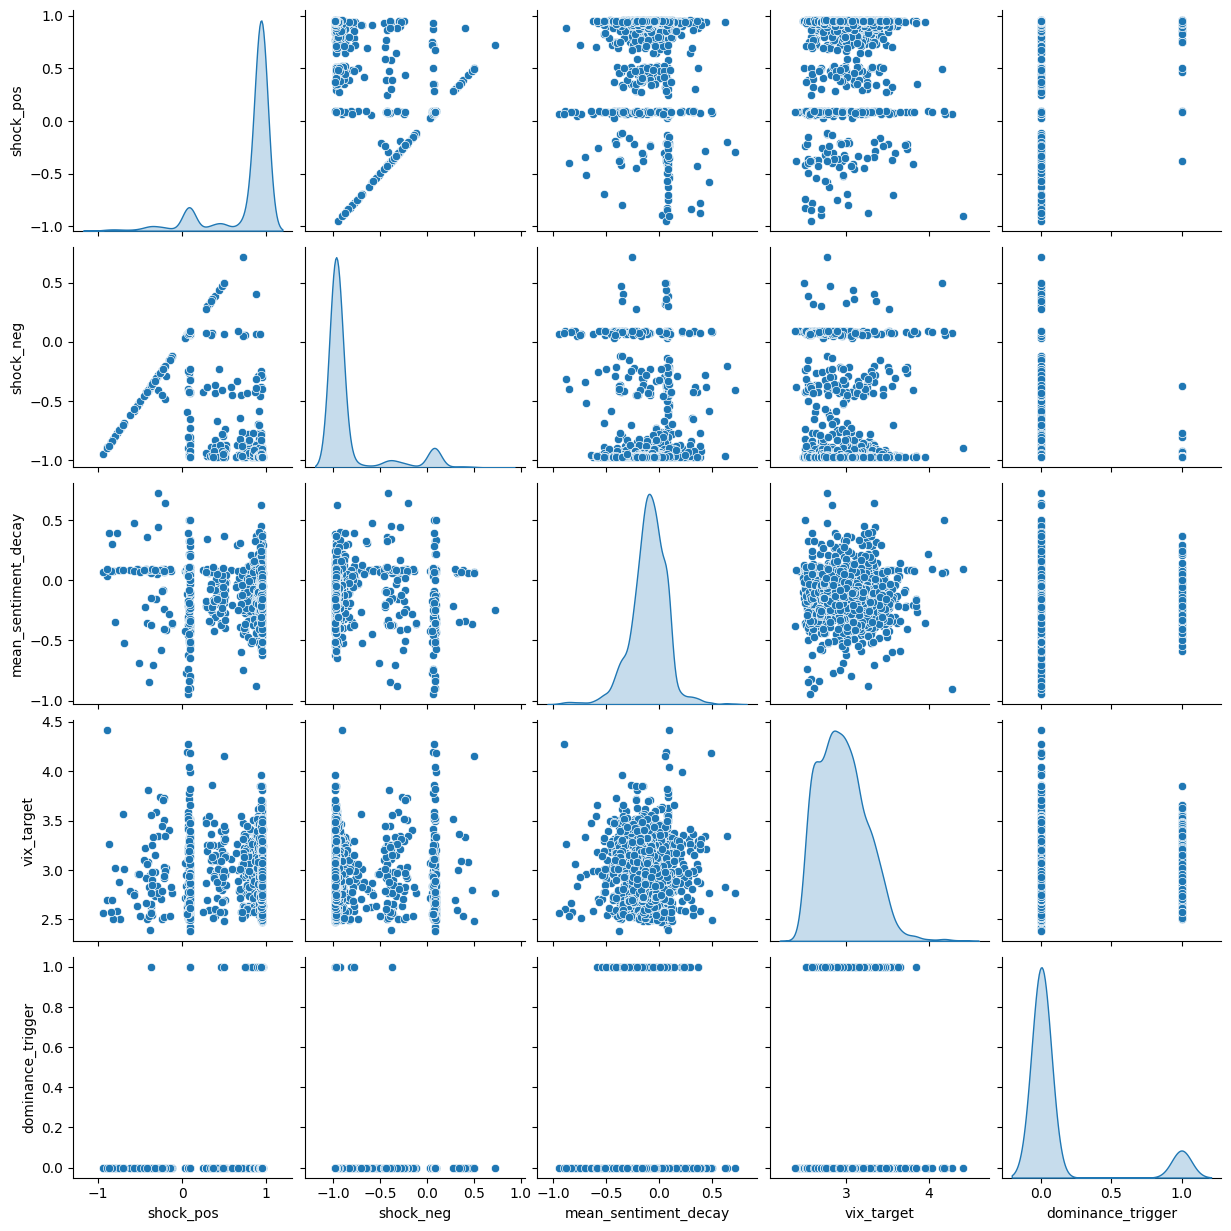

In [192]:
import seaborn as sns
sns.pairplot(df, vars=['shock_pos', 'shock_neg', 'mean_sentiment_decay', 'vix_target', 'dominance_trigger'], diag_kind='kde')


In [193]:
feature_sets = [ #for testing, winner was the first one, decreasing in quality for this model sequentially
    ['shock_neg', 'dominance_trigger'],
    ['shock_neg', 'sentiment_dominance'],
    ['shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_pos', 'shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_pos', 'shock_neg', 'mean_sentiment_decay', 'overall_min', 'sentiment_dominance']
]
selected_features = feature_sets[0]

In [194]:
df.index = pd.to_datetime(df['date'])
df.tail()

,date,date.1,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,...,mean_sentiment_decay,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2025-04-12,2025-04-12,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,...,-0.304711,0.943812,-0.949604,47,0,0.426790,0.340215,22.315343,9.129809,0.939193
2025-04-13,2025-04-13,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,...,-0.049076,0.952528,-0.970495,43,0,0.386445,0.313508,22.457073,9.120357,0.924627
2025-04-14,2025-04-14,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,...,-0.122375,0.944689,-0.972986,116,0,0.386445,0.283756,22.596460,9.108883,0.910489
2025-04-15,2025-04-15,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,...,-0.141765,0.949450,-0.974737,64,0,0.351885,0.185777,22.720816,9.084503,0.814484
2025-04-16,2025-04-16,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,...,-0.156347,0.951529,-0.974891,36,0,0.499311,0.382230,22.884770,9.098183,1.072217


In [195]:
df = df.drop(columns=['date', 'date.1'])

In [196]:
df = df.drop(columns=['summary_max', 'summary_pos_count', 'headline_max', 'overall_max', 'shock_pos'])

In [197]:
#df['vix_target_log'] = np.log(df['vix_target'])
#df['vix_target_log_ret'] = df['vix_target_log'].diff().dropna()

# Train: Post-COVID to end of 2023
#train_df = df[(df.index >= "2018-05-01") & (df.index <= "2024-10-15")]
train_df = df[(df.index <= "2024-10-15")]
# Test: Recent years
test_df = df[df.index >= "2024-10-16"]
print(f"Train set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

df_model = train_df.dropna(subset=feature_sets[0] + ['vix_zscore']).copy() #i chose first set.
X = df_model[feature_sets[0]]
y = df_model['vix_ewm_zscore']


Train set: 1692 rows
Test set: 183 rows


In [198]:
train_df.head()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_target,mean_sentiment_decay,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2018-03-18,-0.806745,-0.806745,1,0.048595,0.048595,1,0,-0.379075,-0.379075,1,...,2.945491,0.071321,-0.379075,-1,0,0.374277,0.653030,15.582198,5.961864,0.576632
2018-03-30,0.084789,0.084789,0,0.084558,0.084558,1,0,0.084673,0.084673,2,...,3.162094,-0.379075,0.084673,1,0,0.753526,1.318488,15.911456,6.056018,1.272873
2018-04-06,0.091514,0.091514,0,0.065591,0.065591,1,0,0.078553,0.078553,2,...,3.067588,0.084673,0.078553,1,0,0.241479,0.908250,16.134523,6.033830,0.887575
2018-04-08,-0.896965,-0.896965,1,0.072943,0.072943,1,0,-0.412011,-0.412011,1,...,3.080533,0.078553,-0.412011,-1,0,-0.416667,0.892227,16.354702,6.015137,0.900278
2018-04-10,-0.525443,-0.638223,3,0.080863,0.068002,3,0,-0.222290,-0.285111,3,...,3.018960,-0.412011,-0.285111,-3,0,-0.200703,0.631611,16.511943,5.950629,0.665149


In [199]:
test_df_trade = test_df.copy()

In [200]:
test_df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_target,mean_sentiment_decay,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2025-04-12,-0.089461,-0.957227,43,-0.008691,-0.941981,105,28,-0.049076,-0.949604,195,...,3.430432,-0.304711,-0.949604,47,0,0.426790,0.340215,22.315343,9.129809,0.939193
2025-04-13,-0.086733,-0.972444,31,-0.158017,-0.968547,71,34,-0.122375,-0.970495,145,...,3.430432,-0.049076,-0.970495,43,0,0.386445,0.313508,22.457073,9.120357,0.924627
2025-04-14,-0.063972,-0.972737,123,-0.219557,-0.973235,208,154,-0.141765,-0.972986,447,...,3.430432,-0.122375,-0.972986,116,0,0.386445,0.283756,22.596460,9.108883,0.910489
2025-04-15,-0.174286,-0.975042,117,-0.138407,-0.974432,195,103,-0.156347,-0.974737,376,...,3.405189,-0.141765,-0.974737,64,0,0.351885,0.185777,22.720816,9.084503,0.814484
2025-04-16,-0.254442,-0.974785,169,-0.164961,-0.974998,247,127,-0.209701,-0.974891,452,...,3.485539,-0.156347,-0.974891,36,0,0.499311,0.382230,22.884770,9.098183,1.072217


In [205]:
transition_matrix, results, df_model = macro_utils.regime_t_markov_model(X, y, df_model)

c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


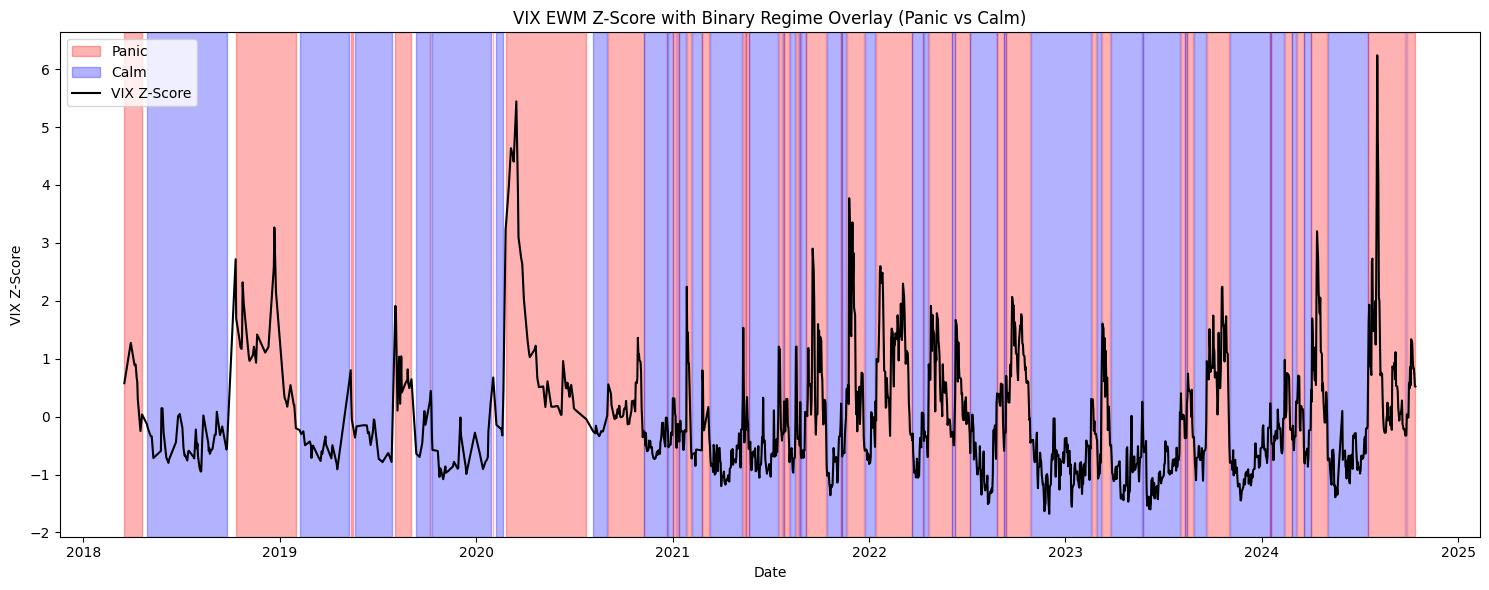

In [206]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['vix_ewm_zscore'], label='VIX_t (EWM Z-Score)', color='black')

# Efficient binary shading
start_idx = None
current_regime = None

for i in range(len(df_model)):
    regime = df_model['regime_t'].iloc[i]
    
    if regime != current_regime:
        if current_regime is not None:
            # Draw previous span
            plt.axvspan(df_model.index[start_idx], df_model.index[i - 1],
                        color='red' if current_regime == 1 else 'blue', alpha=0.3)
        # Start new span
        start_idx = i
        current_regime = regime

# Draw last span
if current_regime is not None:
    plt.axvspan(df_model.index[start_idx], df_model.index[-1],
                color='red' if current_regime == 1 else 'blue', alpha=0.3)

# Legend and labels
panic_patch = mpatches.Patch(color='red', alpha=0.3, label='Panic')
calm_patch = mpatches.Patch(color='blue', alpha=0.3, label='Calm')
plt.legend(handles=[panic_patch, calm_patch, plt.Line2D([], [], color='black', label='VIX Z-Score')])

plt.title('VIX EWM Z-Score with Binary Regime Overlay (Panic vs Calm)')
plt.xlabel('Date')
plt.ylabel('VIX Z-Score')
plt.tight_layout()
plt.show()


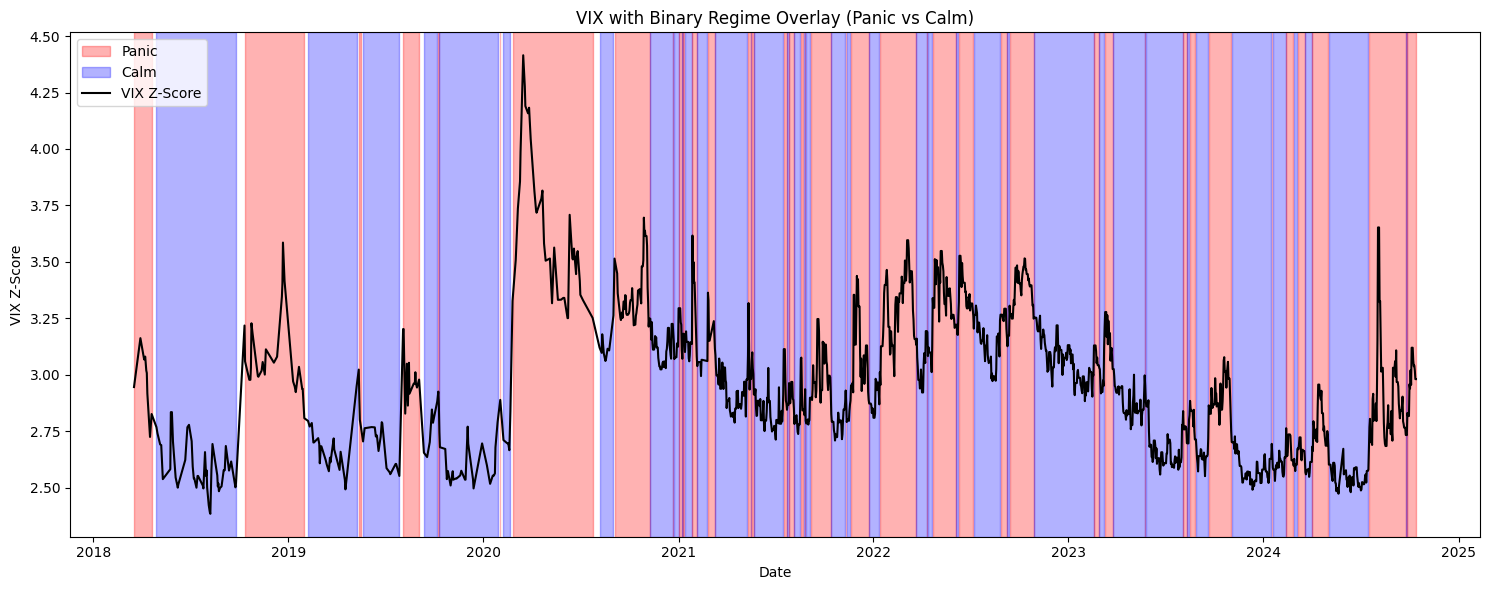

In [207]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['vix_target'], label='VIX_t', color='black')

# Efficient binary shading
start_idx = None
current_regime = None

for i in range(len(df_model)):
    regime = df_model['regime_t'].iloc[i]
    
    if regime != current_regime:
        if current_regime is not None:
            # Draw previous span
            plt.axvspan(df_model.index[start_idx], df_model.index[i - 1],
                        color='red' if current_regime == 1 else 'blue', alpha=0.3)
        # Start new span
        start_idx = i
        current_regime = regime

# Draw last span
if current_regime is not None:
    plt.axvspan(df_model.index[start_idx], df_model.index[-1],
                color='red' if current_regime == 1 else 'blue', alpha=0.3)

# Legend and labels
panic_patch = mpatches.Patch(color='red', alpha=0.3, label='Panic')
calm_patch = mpatches.Patch(color='blue', alpha=0.3, label='Calm')
plt.legend(handles=[panic_patch, calm_patch, plt.Line2D([], [], color='black', label='VIX Z-Score')])

plt.title('VIX with Binary Regime Overlay (Panic vs Calm)')
plt.xlabel('Date')
plt.ylabel('VIX Z-Score')
plt.tight_layout()
plt.show()


In [208]:
df_model.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,ewm_mean,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,regime_0_prob,regime_1_prob,regime_2_prob,regime_t+1,regime_t+1_raw
date,,,,,,,,,,,,,,,,,,,,,
2024-10-09,0.085816,-0.971094,25,-0.014131,-0.970241,98,22,0.035843,-0.970668,193,...,17.367482,4.218518,0.827902,1,1,0.000107,0.583865,0.416028,1.0,1.0
2024-10-10,-0.008239,-0.976220,42,-0.162519,-0.972208,66,47,-0.085379,-0.974214,137,...,17.426366,4.208300,0.832553,1,1,0.000197,0.816278,0.183525,1.0,1.0
2024-10-11,-0.313376,-0.972448,58,-0.157393,-0.971905,57,48,-0.235385,-0.972176,104,...,17.476509,4.191410,0.711810,1,1,0.000389,0.998833,0.000778,1.0,1.0
2024-10-12,0.181630,-0.959148,9,0.054226,-0.946041,31,6,0.117928,-0.952595,59,...,17.513261,4.166363,0.524856,1,1,0.001307,0.996983,0.001710,1.0,1.0
2024-10-13,-0.280690,-0.969393,10,-0.232838,-0.916358,12,8,-0.256764,-0.942875,22,...,17.549406,4.141262,0.519309,1,1,0.001385,0.997080,0.001535,1.0,1.0


In [209]:
clf, y_pred, classification_df = macro_utils.clf_panic_tomorrow(df_model, selected_features, 'regime_t+1')

              precision    recall  f1-score   support

         0.0       0.64      0.94      0.76       969
         1.0       0.79      0.30      0.44       721

    accuracy                           0.67      1690
   macro avg       0.72      0.62      0.60      1690
weighted avg       0.71      0.67      0.62      1690



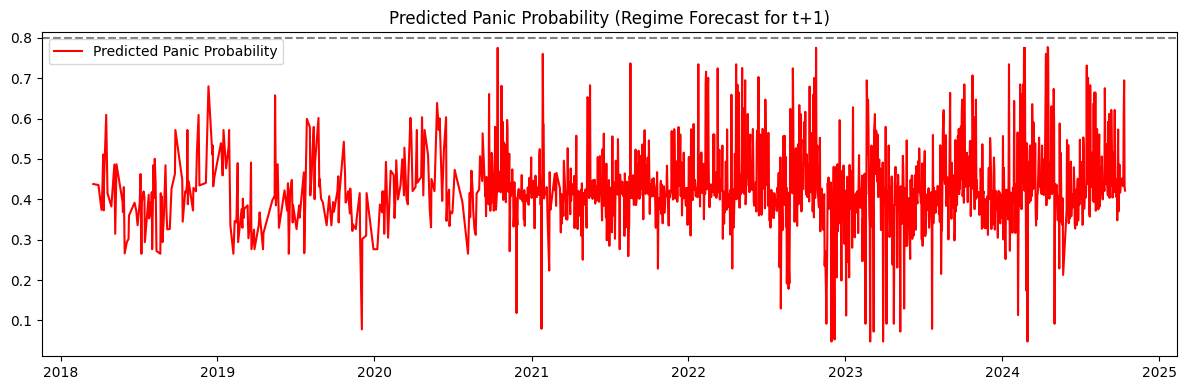

In [210]:
plt.figure(figsize=(12, 4))
plt.plot(df_model.index, df_model['panic_prob'], label='Predicted Panic Probability', color='red')
plt.axhline(0.8, linestyle='--', color='gray')
plt.title("Predicted Panic Probability (Regime Forecast for t+1)")
plt.legend()
plt.tight_layout()
plt.show()


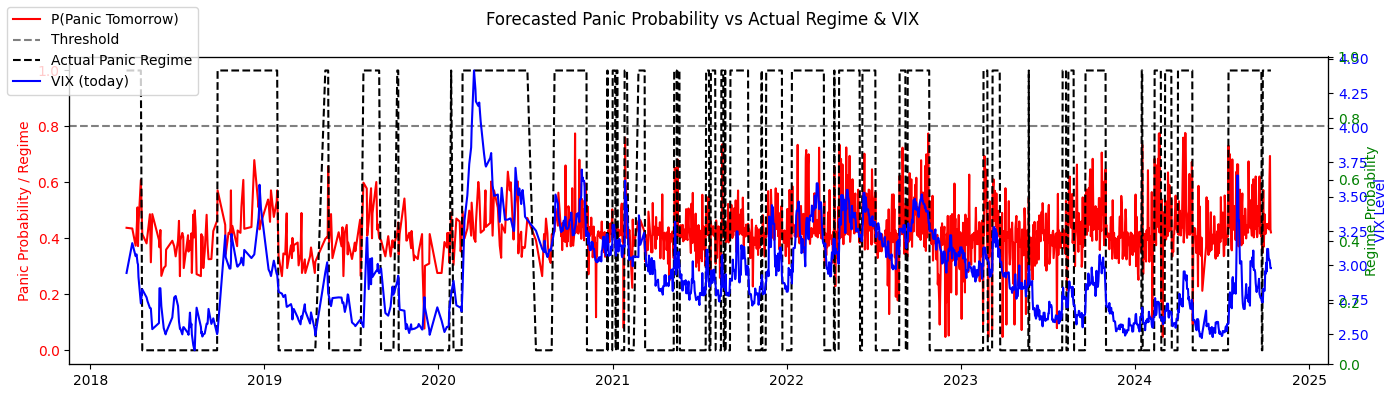

In [211]:
fig, ax1 = plt.subplots(figsize=(14, 4)) #GOLD. panic regime probability goes up before vix even spikes. probability of panic tomorrow from classifier is high.

# Panic probability
ax1.plot(classification_df.index, classification_df['panic_prob'], label='P(Panic Tomorrow)', color='red')
ax1.axhline(0.8, linestyle='--', color='gray', label='Threshold')
ax1.plot(classification_df.index, classification_df['regime_t+1'], linestyle='--', color='black', label='Actual Panic Regime')
ax1.set_ylabel("Panic Probability / Regime", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Add second y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(classification_df.index, classification_df['vix_target'], label='VIX (today)', color='blue')
ax2.set_ylabel("VIX Level", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
#ax3.plot(classification_df.index, classification_df['regime_t_raw'], label='Regime Probability', color='green')
ax3.set_ylabel("Regime Probability", color='green')
ax3.tick_params(axis='y', labelcolor='green')

fig.suptitle("Forecasted Panic Probability vs Actual Regime & VIX")
fig.tight_layout()
fig.legend(loc='upper left')
plt.show()
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()


for each regime=1, we now get the set of days aferwards to see how vix behaves as soon as the model changes regime

In [212]:

classification_df = macro_utils.identify_sustained_regimes_and_transitions(classification_df)

In [213]:
classification_df['is_transition'].value_counts()

is_transition
False    1651
True       39
Name: count, dtype: int64

In [214]:

# Usage Example:
result = macro_utils.transform_vix_data(classification_df, window=60)
vix_windows_df_train = result["vix_windows_df_train"]
regime_windows_df_train = result["regime_windows_df_train"]
vix_windows_past_df_train = result["vix_windows_past_df_train"]


In [215]:

regime_windows_df_train = regime_windows_df_train.replace(2, 1)


In [216]:
regime_windows_df_train.shape

(37, 60)

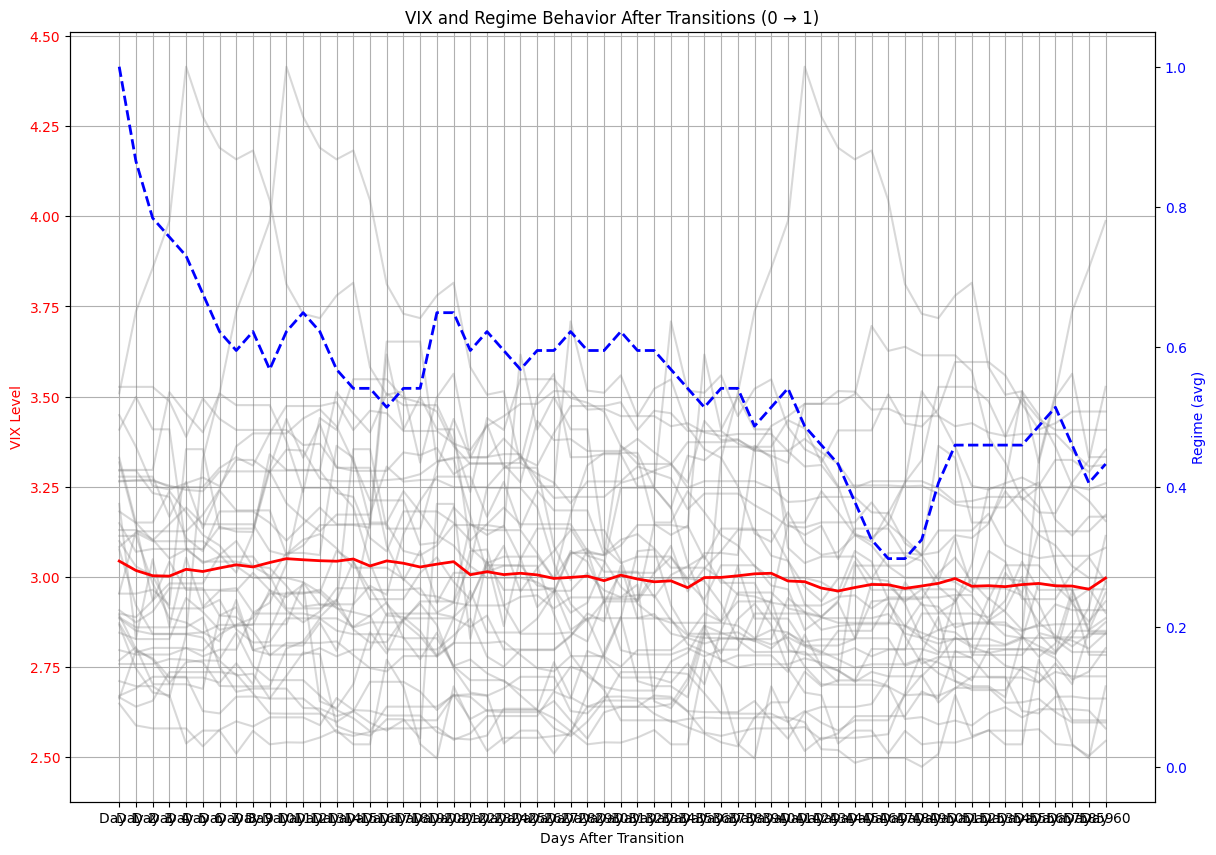

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_train.T, color="gray", alpha=0.3, label="Individual VIX transitions")
ax1.plot(vix_windows_df_train.mean(axis=0).values, color="red", linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_train.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#plt.tight_layout()
plt.show()



since some spikes happen quite some time after the regime switches, we will build a classifier for 0 (immediate) or 1 (delayed), then feed this into a model for vix level forecasting

In [218]:
vix_windows_past_df_train.tail()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-01-17,2.596001,2.596001,2.596001,2.591516,2.553344,2.522524,2.522524,2.540814,2.540814,2.540814,...,2.571084,2.571084,2.546315,2.540814,2.520917,2.541602,2.627563,2.627563,2.627563,2.627563
2024-02-13,2.507972,2.530517,2.530517,2.530517,2.528126,2.615204,2.613739,2.567254,2.564180,2.564180,...,2.615204,2.615204,2.615204,2.569554,2.551786,2.548664,2.559550,2.634045,2.634045,2.634045
2024-03-06,2.571084,2.571084,2.571084,2.546315,2.540814,2.520917,2.541602,2.627563,2.627563,2.627563,...,2.620311,2.620311,2.597491,2.627563,2.595255,2.573375,2.601949,2.601949,2.601949,2.671386
2024-04-02,2.628285,2.615204,2.615204,2.615204,2.569554,2.551786,2.548664,2.559550,2.634045,2.634045,...,2.579459,2.579459,2.579459,2.583243,2.547881,2.565718,2.613739,2.613739,2.613739,2.613739
2024-07-17,2.610070,2.610070,2.610070,2.596746,2.521721,2.519308,2.484073,2.497329,2.497329,2.497329,...,2.515274,2.515274,2.526528,2.553344,2.558777,2.522524,2.574138,2.574138,2.574138,2.579459


In [219]:
vix_windows_df_train.iloc[-1].max()

np.float64(3.6524747643078785)

In [220]:
df_delayed_spike_prob, clf_delayed_spike_prob, vix_pct_change_lookback_df_train = macro_utils.clf_delayed_spike_prob(vix_windows_df_train, df_model, "vix_target")

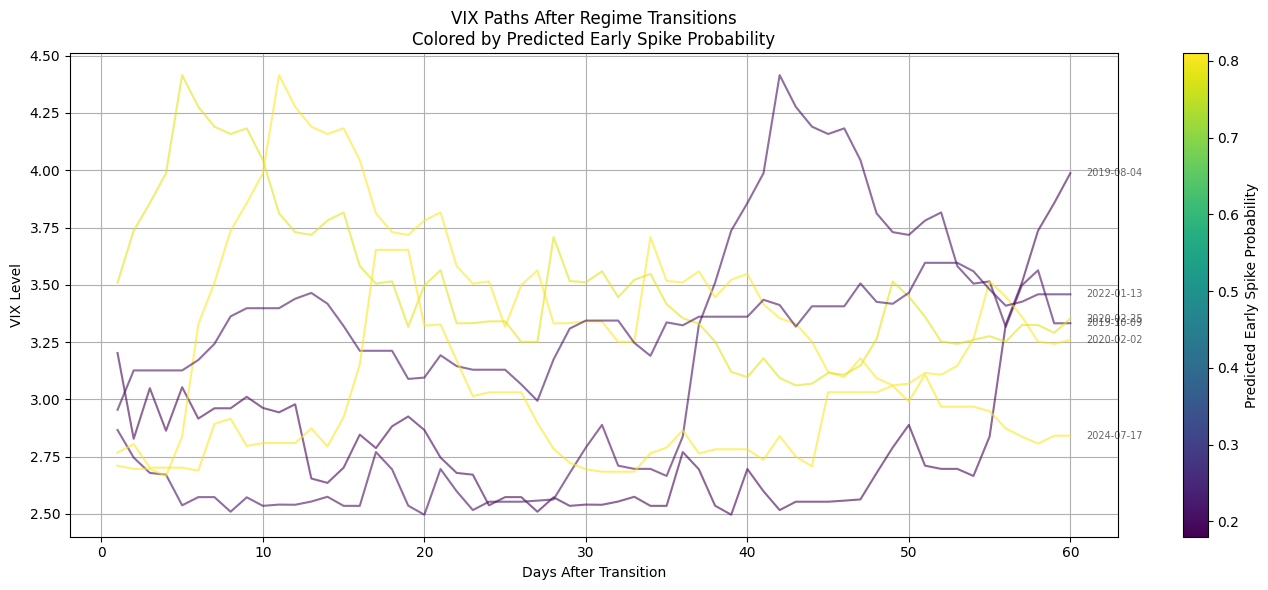

In [221]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [222]:
classification_df['regime_t'].value_counts()

regime_t
0    969
1    721
Name: count, dtype: int64

We will now predict whether the regime switch is a spike or not

because of randomness, we will just predict peak, half decay time, and rising time.

In [223]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news = train_df.copy()                       # original df you posted   # string/ts column → index
news = news.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()


    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats = engineer_news_feats(news)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats.index = pd.to_datetime(news_feats.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats.index.min(),
                          news_feats.index.max(),
                          freq='D')

news_dense = (
    news_feats
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



C:\Users\dsuni\AppData\Local\Temp\ipykernel_8260\37269508.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .ffill()                 # carry last known sentiment forward


In [224]:
train_df.head()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_target,mean_sentiment_decay,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2018-03-18,-0.806745,-0.806745,1,0.048595,0.048595,1,0,-0.379075,-0.379075,1,...,2.945491,0.071321,-0.379075,-1,0,0.374277,0.653030,15.582198,5.961864,0.576632
2018-03-30,0.084789,0.084789,0,0.084558,0.084558,1,0,0.084673,0.084673,2,...,3.162094,-0.379075,0.084673,1,0,0.753526,1.318488,15.911456,6.056018,1.272873
2018-04-06,0.091514,0.091514,0,0.065591,0.065591,1,0,0.078553,0.078553,2,...,3.067588,0.084673,0.078553,1,0,0.241479,0.908250,16.134523,6.033830,0.887575
2018-04-08,-0.896965,-0.896965,1,0.072943,0.072943,1,0,-0.412011,-0.412011,1,...,3.080533,0.078553,-0.412011,-1,0,-0.416667,0.892227,16.354702,6.015137,0.900278
2018-04-10,-0.525443,-0.638223,3,0.080863,0.068002,3,0,-0.222290,-0.285111,3,...,3.018960,-0.412011,-0.285111,-3,0,-0.200703,0.631611,16.511943,5.950629,0.665149


In [225]:
# ------------------------------------------------------------
# 3)  BUILD ARC-LEVEL TABLE  (robust to missing news dates + look-back stats)
# ------------------------------------------------------------
records = []
lookback_days = [2, 5, 7]
lookback_feats = [
    "shock_neg",
    "vix_zscore",
    "vix_target",
    "sentiment_dominance",

]

for dt, row in vix_windows_df_train.iterrows():
    # --- detect arc in the 60-day window ---
    v = row[[f"Day {i}" for i in range(1, 61)]].values
    r = regime_windows_df_train.loc[dt, [f"Day {i}" for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc_within_regime(v, r)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur = peak_idx - start_idx
    decay_idx = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest-past news features --------
    try:
        feats_on_start = news_dense.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    # -------- compute look-back statistics from classification_df --------
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df.loc[start_date:dt_norm]

        for feat in lookback_feats:
            col_mean = window_df[feat].mean()
            col_std = window_df[feat].std()
            # percent change over the window: (last−first) / first
            if len(window_df) > 1 and window_df[feat].iloc[0] != 0:
                col_pct = (window_df[feat].iloc[-1] - window_df[feat].iloc[0]) / window_df[feat].iloc[0]
            else:
                col_pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"] = col_mean
            lookback_stats[f"{feat}_std_{w}d"]  = col_std
            lookback_stats[f"{feat}_pctchg_{w}d"] = col_pct

    # --- aggregate everything into one record ---
    records.append({
        "date_start":    dt_norm,
        "peak_vix":      peak_val,
        "vix0":          start_val,
        "T_up":          rise_dur,
        "T_half":        half_life,
        **feats_on_start,
        **lookback_stats,
    })

arc_df = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)

arc_df shape: (37, 63)


In [226]:
arc_df['early_spike_prob'] = vix_windows_df_train['early_spike_prob'].fillna(0.5)

In [227]:
arc_df = arc_df.dropna()

In [228]:
arc_df = arc_df.drop(columns=['vix_target'])

In [229]:
len(arc_df)

31

In [312]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

target_cols   = ["peak_vix", "T_up", "T_half"]
feature_cols  = arc_df.columns.difference(target_cols)

mlp_params = dict(
    hidden_layer_sizes=(12,6),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,   # ↑ a bit
    alpha=1e-1,                # much weaker L2
    max_iter=2000,
    batch_size=8,
    early_stopping=True, 
    validation_fraction=0.2,
    n_iter_no_change=30,
    random_state=42,
)

# ============================================================
# 1)  INPUT MATRICES & CV SPLIT
# ============================================================
X_full = arc_df[feature_cols].values
y_full = arc_df[target_cols].values
tscv   = TimeSeriesSplit(n_splits=10)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# ============================================================
# 2)  TRAIN PER‑TARGET WITH y‑SCALING
# ============================================================
models, cv_mae = {}, {}

for i, col in enumerate(target_cols):
    y = y_full[:, i]

    # pipeline: X‑scaler → MLP, plus y‑scaler wrapper
    base_pipe = Pipeline([
        ("scale_X", StandardScaler()),
        ("mlp",     MLPRegressor(**mlp_params)),
    ])
    qt = QuantileTransformer(n_quantiles=59, output_distribution='normal', random_state=42)
    pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        transformer=qt     # scales y
    )

    # walk‑forward CV
    cv = cross_validate(pipe, X_full, y,
                        cv=tscv,
                        scoring=mae_scorer,
                        n_jobs=-1,
                        return_train_score=False)
    cv_mae[col] = -cv["test_score"].mean()
    print(f"{col:8s} | MAE (5-fold): {cv_mae[col]:.3f}")

    # fit on all data & save
    pipe.fit(X_full, y)
    models[col] = pipe
    joblib.dump(pipe, f"mlp_{col}.pkl")

print("\nSaved pickled models:", [f"mlp_{c}.pkl" for c in target_cols])

# ============================================================
# 3)  HELPER FOR NEW PREDICTIONS
# ============================================================
def predict_new_arc(row_df: pd.DataFrame):
    """
    row_df: DataFrame with one row and the same feature columns.
    returns dict {target: prediction}
    """
    preds = {col: float(models[col].predict(row_df[feature_cols].values))
             for col in target_cols}
    return preds

# Example:
# new_row = arc_df.iloc[[-1]]
# print(predict_new_arc(new_row))


peak_vix | MAE (5-fold): 0.229


c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (59) is greater than the total number of samples (31). n_quantiles is set to n_samples.
  warnings.warn(


T_up     | MAE (5-fold): 6.314


c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (59) is greater than the total number of samples (31). n_quantiles is set to n_samples.
  warnings.warn(


T_half   | MAE (5-fold): 8.515

Saved pickled models: ['mlp_peak_vix.pkl', 'mlp_T_up.pkl', 'mlp_T_half.pkl']


c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (59) is greater than the total number of samples (31). n_quantiles is set to n_samples.
  warnings.warn(


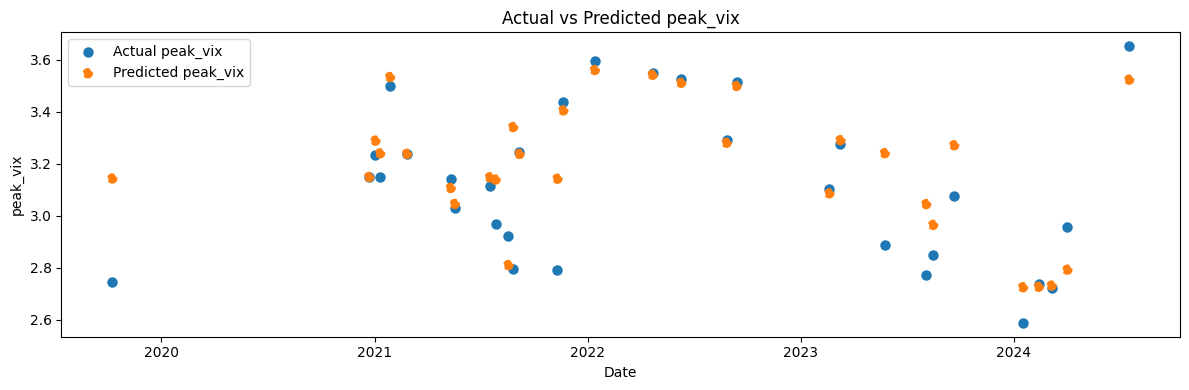

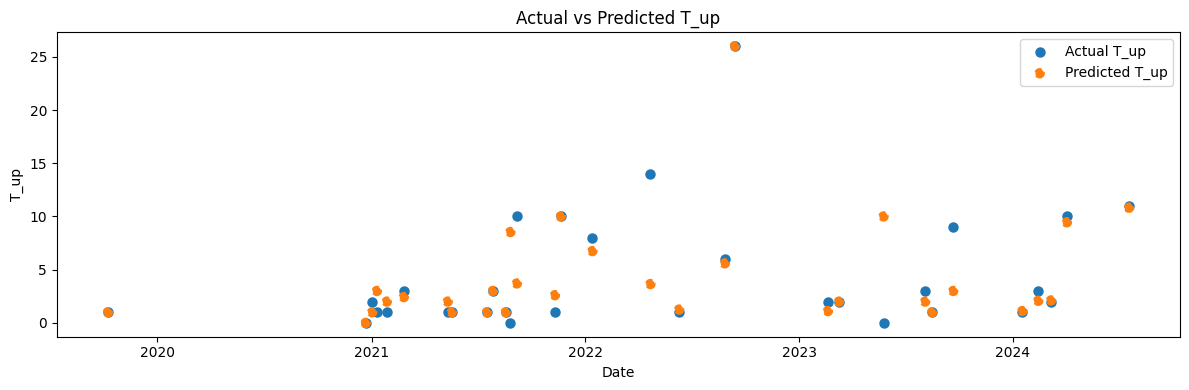

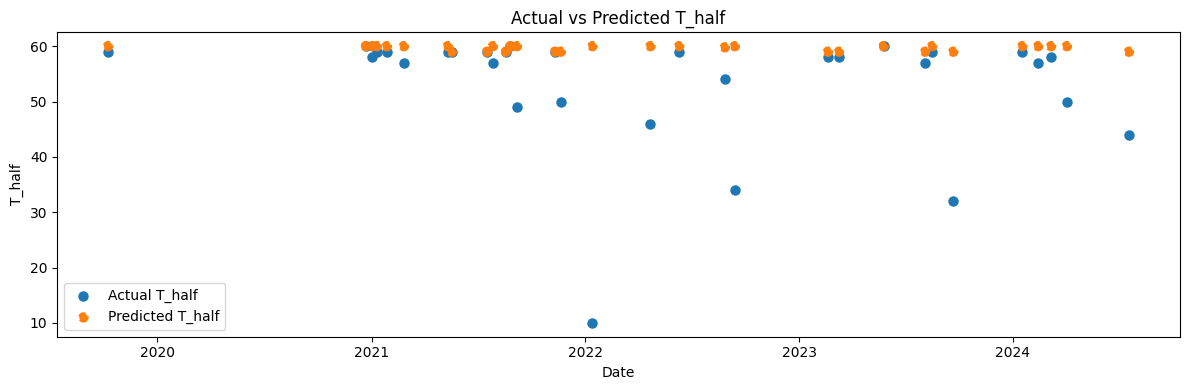

In [313]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])
X_full       = arc_df[feature_cols].values
dates        = arc_df.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}

for target, model in models.items():
    y_true = arc_df[target].values
    y_pred = model.predict(X_full)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [311]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])
X_full_test = arc_df_test.reindex(columns=feature_cols).values

dates = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# XGBoost

In [234]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_pinball_loss
from xgboost import XGBRegressor

# Define targets and features
target_cols   = ["peak_vix", "T_up", "T_half"]
feature_cols  = arc_df.columns.difference(target_cols)

# XGBoost parameters (adjust as needed)

xgb_params = {
    "n_estimators": 150,           # very few trees
    "max_depth": 2,               # extremely shallow
    "learning_rate": 0.05,        # slow learning
    "subsample": 0.6,             # random row sampling
    "colsample_bytree": 0.6,      # random feature sampling
    "reg_alpha": 1,             # strong L1 regularization
    "reg_lambda": 5,            # strong L2 regularization
    "random_state": 42,
    "gamma": 0.1,
    "mean_child_weight": 2,
}
quantile_level = 0.65   # e.g. 0.5 for median regression
xgb_params.update({
    "objective":     "reg:quantileerror",  # tell XGBoost to use pinball loss :contentReference[oaicite:0]{index=0}
    "quantile_alpha": quantile_level,      # which quantile to predict :contentReference[oaicite:1]{index=1}
})

# ============================================================
# 1)  INPUT MATRICES & CV SPLIT
# ============================================================
X_full = arc_df[feature_cols].values
y_full = arc_df[target_cols].values
tscv   = TimeSeriesSplit(n_splits=10)

pinball_scorer = make_scorer(
    mean_pinball_loss,
    greater_is_better=False,
    alpha=quantile_level
)
# ============================================================
# 2)  TRAIN PER‑TARGET WITH y‑SCALING
# ============================================================
models, cv_mae = {}, {}

for i, col in enumerate(target_cols):
    y = y_full[:, i]

    # pipeline: X‑scaler → XGBoost, plus y‑scaler wrapper
    base_pipe = Pipeline([
        ("scale_X", StandardScaler()),
        ("xgb",     XGBRegressor(**xgb_params)),
    ])
    pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        transformer=StandardScaler()     # scales y
    )

    # walk‑forward CV
    cv = cross_validate(
        pipe, X_full, y,
        cv=tscv,
        scoring=pinball_scorer,
        n_jobs=-1,
        return_train_score=False
    )
    cv_mae[col] = -cv["test_score"].mean()
    print(f"{col:8s} | MAE (5-fold): {cv_mae[col]:.3f}")

    # fit on all data & save
    pipe.fit(X_full, y)
    models[col] = pipe
    joblib.dump(pipe, f"xgb_{col}.pkl")

print("\nSaved pickled models:", [f"xgb_{c}.pkl" for c in target_cols])

# ============================================================
# 3)  HELPER FOR NEW PREDICTIONS
# ============================================================
def predict_new_arc(row_df: pd.DataFrame):
    """
    row_df: DataFrame with one row and the same feature columns.
    returns dict {target: prediction}
    """
    preds = {
        col: float(models[col].predict(row_df[feature_cols].values))
        for col in target_cols
    }
    return preds

# Example:
# new_row = arc_df.iloc[[-1]]
# print(predict_new_arc(new_row))


peak_vix | MAE (5-fold): 0.130


c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:54:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


T_up     | MAE (5-fold): 2.814
T_half   | MAE (5-fold): 3.234

Saved pickled models: ['xgb_peak_vix.pkl', 'xgb_T_up.pkl', 'xgb_T_half.pkl']


c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:54:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:54:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mean_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


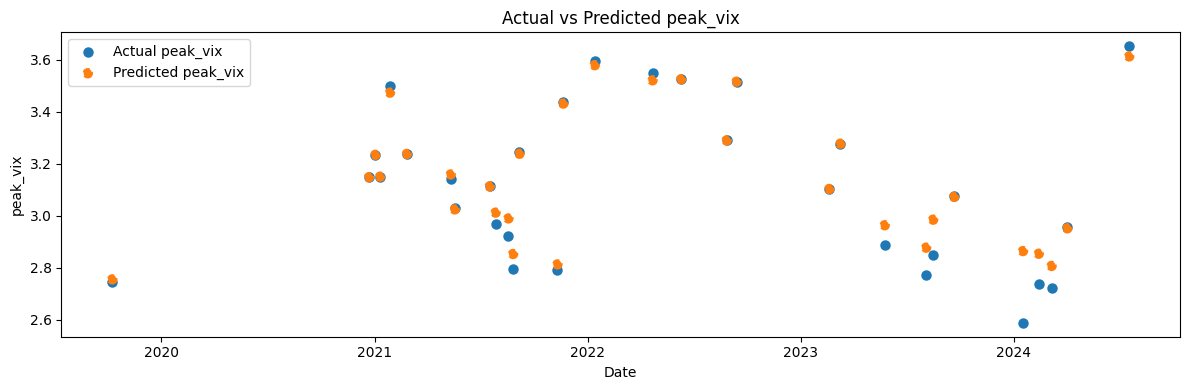

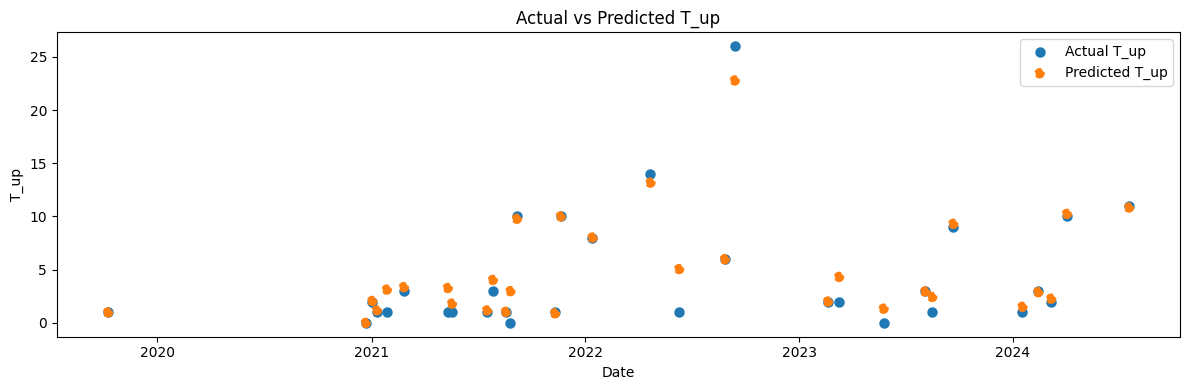

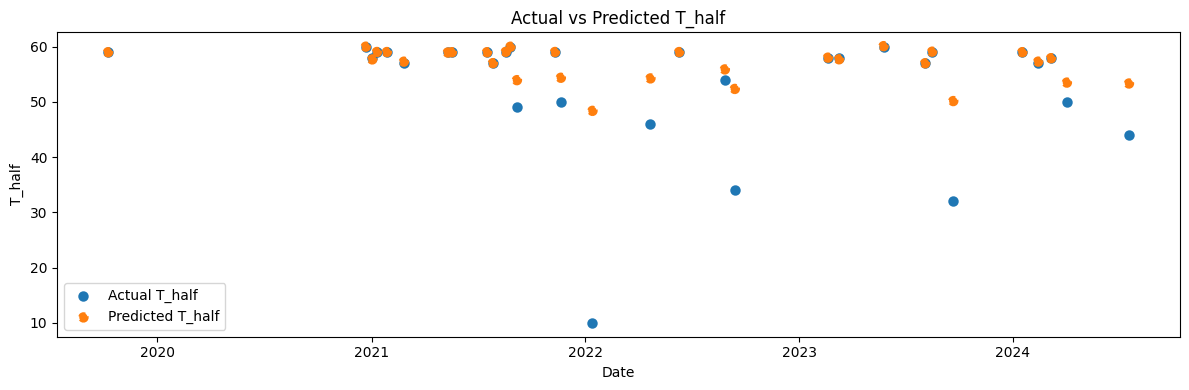

In [300]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])
X_full       = arc_df[feature_cols].values
dates        = arc_df.index         # x‑axis

models = {
    "peak_vix": joblib.load("xgb_peak_vix.pkl"),
    "T_up":     joblib.load("xgb_T_up.pkl"),
    "T_half":   joblib.load("xgb_T_half.pkl"),
}

for target, model in models.items():
    y_true = arc_df[target].values
    y_pred = model.predict(X_full)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


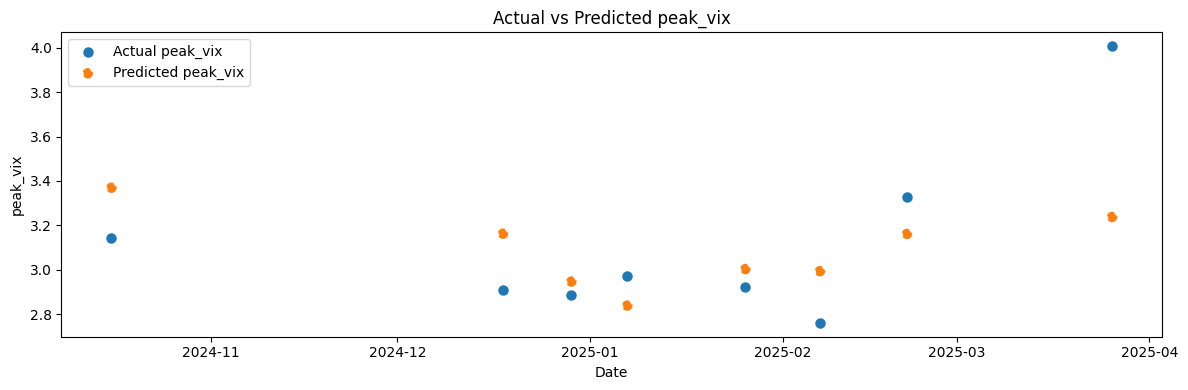

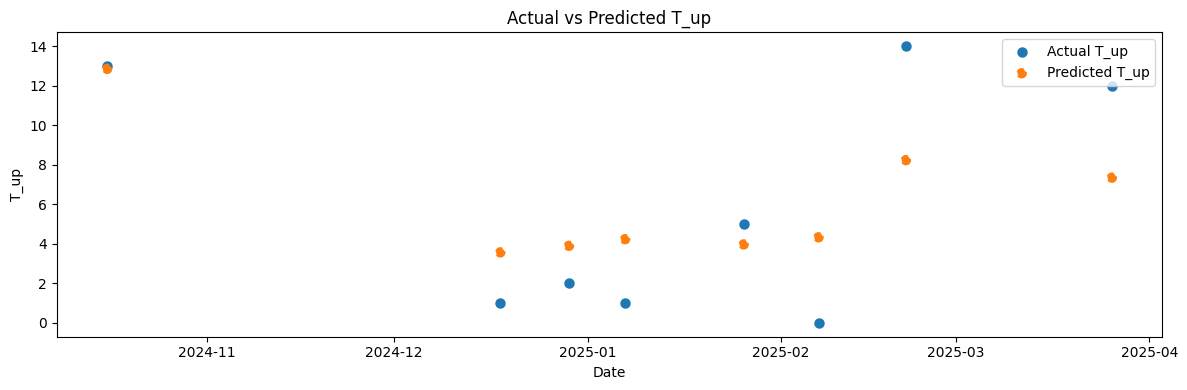

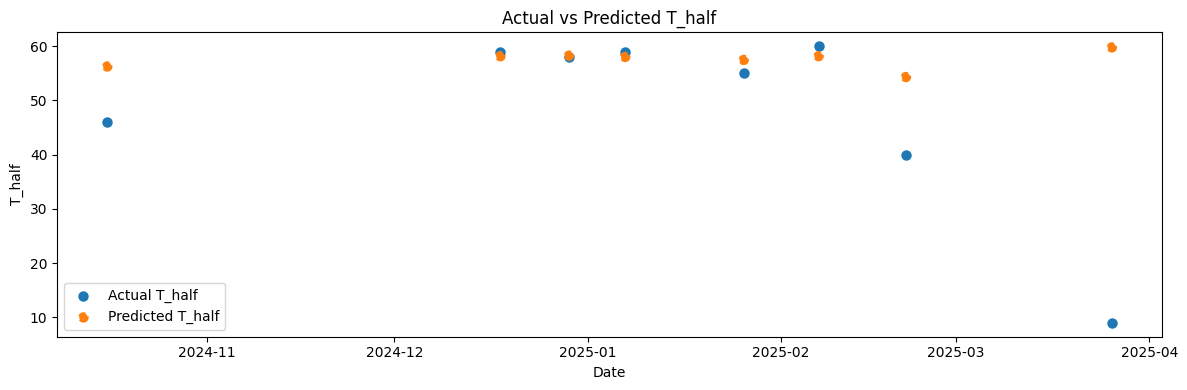

In [302]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df_test.columns.difference(["peak_vix", "T_up", "T_half"])
X_full_test       = arc_df_test[feature_cols].values
dates        = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("xgb_peak_vix.pkl"),
    "T_up":     joblib.load("xgb_T_up.pkl"),
    "T_half":   joblib.load("xgb_T_half.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Test Set on models (regime + panic probability)


In [236]:
vix_windows_df_train.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2019-05-13,2.893700,2.799717,2.770086,2.704711,2.763170,2.768204,2.766948,2.726545,2.731115,2.662355,...,2.554122,2.574900,2.535283,2.535283,2.770086,2.694627,2.536075,2.496506,2.695978,NaN
2019-08-04,3.202340,2.827905,3.048799,2.863343,3.053057,2.916148,2.961141,2.961141,3.011113,2.962692,...,2.696652,2.696652,2.665838,2.837908,3.326833,3.509154,3.736240,3.856510,3.987131,0.1800
2019-10-09,2.866193,2.745988,2.678965,2.671386,2.537657,2.573375,2.573375,2.509599,2.572612,2.535283,...,3.815732,3.581573,3.505257,3.514824,3.316728,3.497719,3.563316,3.331847,3.332562,0.2025
2020-02-02,2.710713,2.696652,2.696652,2.665838,2.837908,3.326833,3.509154,3.736240,3.856510,3.987131,...,3.107721,3.147165,3.262701,3.514526,3.448717,3.360723,3.252311,3.242202,3.259634,0.8100
2020-02-25,3.509154,3.736240,3.856510,3.987131,4.415099,4.276666,4.190261,4.158102,4.182661,4.044454,...,3.252311,3.242202,3.259634,3.275634,3.251537,3.324316,3.324316,3.290638,3.352707,0.7825


In [316]:
print(results.params)

p[0->0]     0.970583
p[1->0]     0.050806
p[2->0]     0.001225
p[0->1]     0.028193
p[1->1]     0.903325
p[2->1]     0.151330
const[0]   -0.469569
const[1]    0.639694
const[2]    3.023519
x1[0]       0.260374
x1[1]       0.363831
x1[2]       1.380989
x2[0]       0.008535
x2[1]       0.149658
x2[2]       0.568112
sigma2      0.197829
dtype: float64


In [322]:
# 1. After fitting on training set
train_params = results.params


X_test = test_df[selected_features]
y_test = test_df['vix_ewm_zscore']

# 3. Define same model on test data
model_test = MarkovRegression(
    endog=y_test,
    exog=X_test,
    k_regimes=3,
    switching_variance=False
)

# 4. Apply training parameters with FILTER (real-time regime inference)
results_test = model_test.filter(train_params)

# 5. Extract real-time regime (filtered) — sensitive threshold
test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities.idxmax(axis=1)
test_df['regime_t'] = test_df['regime_t_raw'].apply(lambda r: 1 if r in [2] else 0) #[1,2]

# 6. Predict probability of panic regime tomorrow using classifier (NO regime_t)
test_df['panic_prob_t+1'] = clf.predict_proba(X_test)[:, 1]

# 7. (Optional) Align as prediction for tomorrow
test_df['vix_target_t+1'] = test_df['vix_target'].shift(-1)



c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dsuni\AppData\Local\Temp\ipykernel_8260\3599856330.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities.idxmax(axis=1)
C:\Users\dsuni\AppData\Local\Temp\ipykernel_8260\3599856330.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [323]:
test_df.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1,regime_group,is_sustained_regime1,regime_t-1,is_transition
date,,,,,,,,,,,,,,,,,,,,,
2025-04-12,-0.089461,-0.957227,43,-0.008691,-0.941981,105,28,-0.049076,-0.949604,195,...,9.129809,0.939193,2,1,0.433261,3.430432,15,True,1.0,False
2025-04-13,-0.086733,-0.972444,31,-0.158017,-0.968547,71,34,-0.122375,-0.970495,145,...,9.120357,0.924627,2,1,0.433255,3.430432,15,True,1.0,False
2025-04-14,-0.063972,-0.972737,123,-0.219557,-0.973235,208,154,-0.141765,-0.972986,447,...,9.108883,0.910489,1,0,0.535711,3.405189,15,True,1.0,False
2025-04-15,-0.174286,-0.975042,117,-0.138407,-0.974432,195,103,-0.156347,-0.974737,376,...,9.084503,0.814484,1,0,0.438002,3.485539,15,True,1.0,False
2025-04-16,-0.254442,-0.974785,169,-0.164961,-0.974998,247,127,-0.209701,-0.974891,452,...,9.098183,1.072217,1,0,0.323958,NaN,15,True,1.0,False


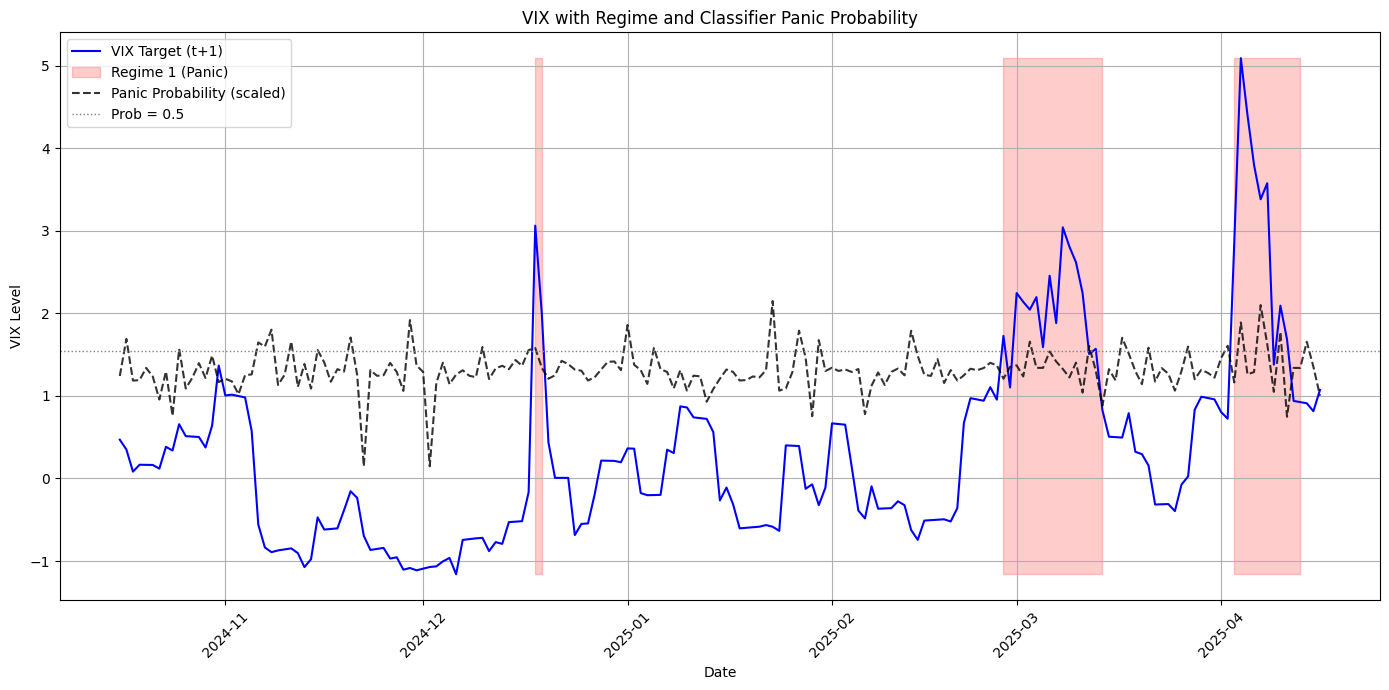

In [324]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(test_df.index, test_df["vix_ewm_zscore"], label="VIX Target (t+1)", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    test_df.index,
    test_df["vix_ewm_zscore"].min(),
    test_df["vix_ewm_zscore"].max(),
    where=test_df["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = test_df["panic_prob_t+1"] * (test_df["vix_ewm_zscore"].max() - 2)
plt.plot(test_df.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (test_df["vix_ewm_zscore"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

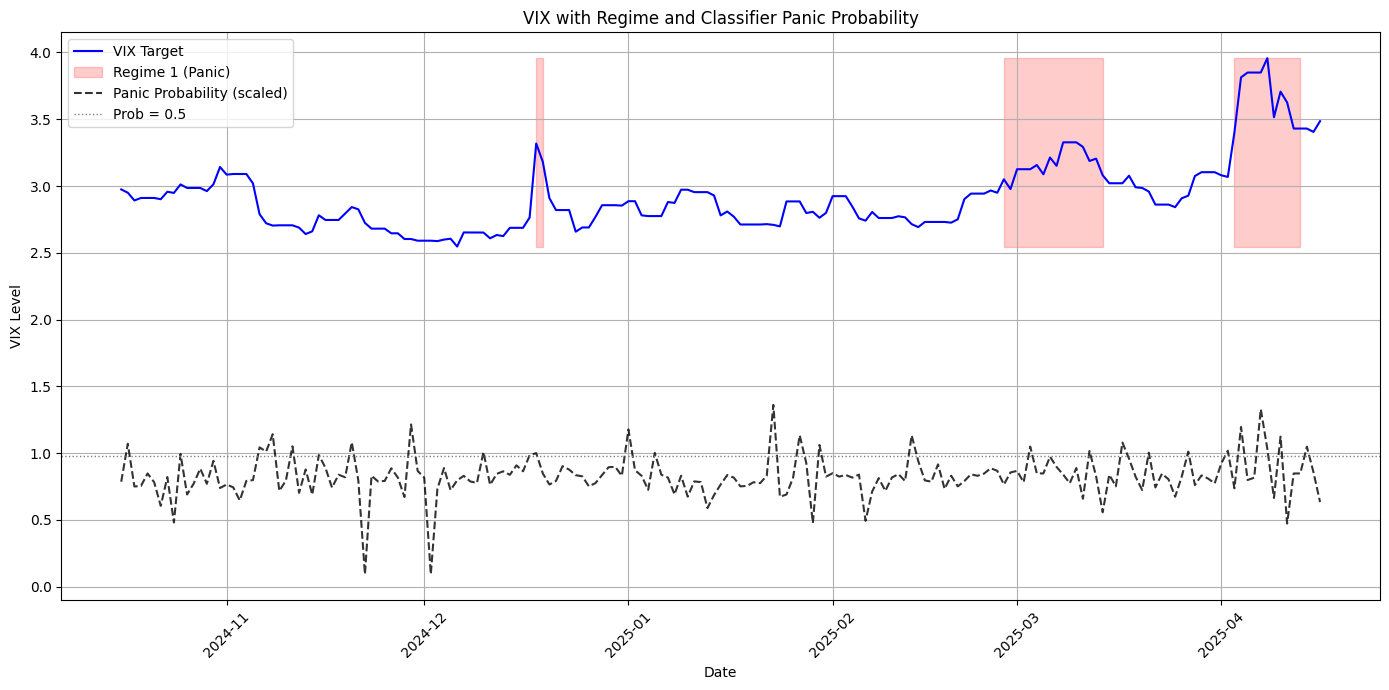

In [325]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(test_df.index, test_df["vix_target"], label="VIX Target", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    test_df.index,
    test_df["vix_target"].min(),
    test_df["vix_target"].max(),
    where=test_df["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = test_df["panic_prob_t+1"] * (test_df["vix_target"].max() - 2)
plt.plot(test_df.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (test_df["vix_target"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [242]:
test_df.head()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1
date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,-0.222685,-0.976018,47,-0.167496,-0.971121,51,40,-0.195090,-0.973569,95,...,0,0.016615,0.412830,17.667591,4.074235,0.469391,1,1,0.401730,2.950212
2024-10-17,-0.224310,-0.974795,34,-0.272826,-0.973557,36,40,-0.248568,-0.974176,78,...,0,0.011111,0.193659,17.691432,4.044642,0.350728,1,1,0.546860,2.892037
2024-10-18,-0.248795,-0.973813,27,-0.209752,-0.970884,28,22,-0.229274,-0.972349,51,...,0,-0.120059,-0.260678,17.697028,4.011310,0.083008,1,1,0.383455,2.910719
2024-10-19,0.076486,-0.904173,5,-0.051621,-0.936994,13,4,0.012432,-0.920584,25,...,0,-0.043727,-0.148076,17.708152,3.978954,0.166337,1,1,0.385498,2.910719
2024-10-20,-0.148248,-0.970708,11,0.232043,-0.928842,25,4,0.041897,-0.949775,43,...,0,-0.188604,-0.183860,17.719091,3.946843,0.164919,1,1,0.433261,2.910719


In [243]:
classification_df_test = macro_utils.identify_sustained_regimes_and_transitions(test_df)

c:\Users\dsuni\Documents\GitHub\VIXNLP\VIXNLP\finnhub_news\macro_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Group by consecutive regime IDs
c:\Users\dsuni\Documents\GitHub\VIXNLP\VIXNLP\finnhub_news\macro_utils.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['is_sustained_regime1'] = classification_df['regime_group'].isin(valid_groups)
c:\Users\dsuni\Documents\GitHub\VIXNLP\VIXNLP\finnhub_news\macro_utils.py:109: SettingWithCopyWarning: 
A value is trying to be set 

In [244]:
classification_df_test

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,panic_prob_t+1,vix_target_t+1,regime_group,is_sustained_regime1,regime_t-1,is_transition
date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,-0.222685,-0.976018,47,-0.167496,-0.971121,51,40,-0.195090,-0.973569,95,...,4.074235,0.469391,1,1,0.401730,2.950212,1,True,NaN,False
2024-10-17,-0.224310,-0.974795,34,-0.272826,-0.973557,36,40,-0.248568,-0.974176,78,...,4.044642,0.350728,1,1,0.546860,2.892037,1,True,1.0,False
2024-10-18,-0.248795,-0.973813,27,-0.209752,-0.970884,28,22,-0.229274,-0.972349,51,...,4.011310,0.083008,1,1,0.383455,2.910719,1,True,1.0,False
2024-10-19,0.076486,-0.904173,5,-0.051621,-0.936994,13,4,0.012432,-0.920584,25,...,3.978954,0.166337,1,1,0.385498,2.910719,1,True,1.0,False
2024-10-20,-0.148248,-0.970708,11,0.232043,-0.928842,25,4,0.041897,-0.949775,43,...,3.946843,0.164919,1,1,0.433261,2.910719,1,True,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-12,-0.089461,-0.957227,43,-0.008691,-0.941981,105,28,-0.049076,-0.949604,195,...,9.129809,0.939193,2,1,0.433261,3.430432,15,True,1.0,False
2025-04-13,-0.086733,-0.972444,31,-0.158017,-0.968547,71,34,-0.122375,-0.970495,145,...,9.120357,0.924627,2,1,0.433255,3.430432,15,True,1.0,False
2025-04-14,-0.063972,-0.972737,123,-0.219557,-0.973235,208,154,-0.141765,-0.972986,447,...,9.108883,0.910489,1,1,0.535711,3.405189,15,True,1.0,False


In [245]:
result = macro_utils.transform_vix_data(classification_df_test, window=60, test=True)
vix_windows_df_test = result["vix_windows_df_train"]
regime_windows_df_test = result["regime_windows_df_train"]
vix_windows_past_df_test = result["vix_windows_past_df_train"]

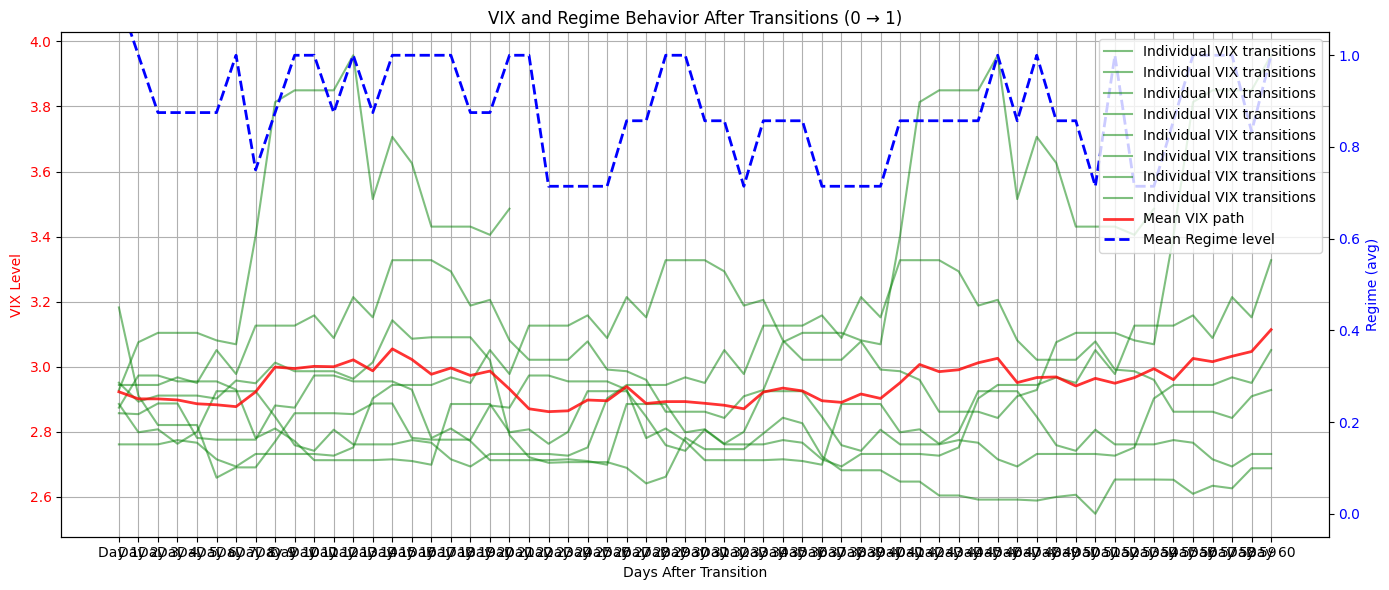

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_test.T, color="green", alpha=0.5, label="Individual VIX transitions")
ax1.plot(vix_windows_df_test.mean(axis=0).values, color="red",alpha=0.8, linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_test.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()


In [247]:
vix_windows_df_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.547099,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167
2024-12-18,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,2.689886,2.769459,2.856470,...,2.805782,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115
2024-12-29,2.856470,2.853593,2.886475,2.886475,2.780681,2.775086,2.775086,2.775086,2.880321,2.873565,...,2.731115,2.725890,2.751110,2.901971,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694
2025-01-07,2.873565,2.972464,2.972464,2.954389,2.954389,2.954389,2.929058,2.780061,2.809403,2.770712,...,3.050694,2.977059,3.125883,3.125883,3.125883,3.157426,3.087856,3.213662,3.151453,3.327192
2025-01-26,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,2.758109,...,3.077312,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,2.927989
2025-02-07,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115,2.731115,...,3.103689,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,3.849722,3.849722,3.957570
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.430432,3.405189,3.485539,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-26,2.927989,3.075005,3.103689,3.103689,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
df_delayed_spike_prob_test, test_clf, test_vix_pct_change_lookback_df = macro_utils.clf_delayed_spike_prob(vix_windows_df_test, test_df, "vix_target")

In [249]:
df_delayed_spike_prob_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,NaN
2024-12-18,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,2.689886,2.769459,2.856470,...,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115,NaN
2024-12-29,2.856470,2.853593,2.886475,2.886475,2.780681,2.775086,2.775086,2.775086,2.880321,2.873565,...,2.725890,2.751110,2.901971,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,NaN
2025-01-07,2.873565,2.972464,2.972464,2.954389,2.954389,2.954389,2.929058,2.780061,2.809403,2.770712,...,2.977059,3.125883,3.125883,3.125883,3.157426,3.087856,3.213662,3.151453,3.327192,NaN
2025-01-26,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,2.758109,...,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,2.927989,NaN


In [250]:
test_vix_pct_change_lookback_df.head()

,Day -30,Day -29,Day -28,Day -27,Day -26,Day -25,Day -24,Day -23,Day -22,Day -21,...,Day -10,Day -9,Day -8,Day -7,Day -6,Day -5,Day -4,Day -3,Day -2,Day -1
2025-02-07,-0.002346,0.034417,0.000000,-0.006081,0.000000,0.00000,-0.008574,-0.050869,0.010554,-0.013772,...,-0.030127,0.003252,-0.015836,0.013238,0.044703,0.000000,0.000000,-0.026929,-0.030709,-0.006261
2025-02-21,0.000978,-0.001957,-0.004201,0.069237,0.000000,0.00000,-0.030127,0.003252,-0.015836,0.013238,...,0.004780,-0.002937,-0.018439,-0.008140,0.014305,0.000000,0.000000,0.000000,-0.001913,0.009252
2025-03-26,0.000000,0.007961,-0.005774,0.034243,-0.024137,0.04999,0.000000,0.000000,0.010091,-0.022034,...,0.000000,0.000000,0.018670,-0.028139,-0.001684,-0.008914,-0.033122,0.000000,0.000000,-0.006662


In [251]:
df_delayed_spike_prob_test.loc[test_vix_pct_change_lookback_df.index, "early_spike_prob"] = clf_delayed_spike_prob.predict_proba(test_vix_pct_change_lookback_df)[:, 1]


In [252]:
df_delayed_spike_prob_test.fillna(0.5, inplace=True)

In [253]:
df_delayed_spike_prob_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,0.500
2024-12-18,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,2.689886,2.769459,2.856470,...,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115,0.500
2024-12-29,2.856470,2.853593,2.886475,2.886475,2.780681,2.775086,2.775086,2.775086,2.880321,2.873565,...,2.725890,2.751110,2.901971,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,0.500
2025-01-07,2.873565,2.972464,2.972464,2.954389,2.954389,2.954389,2.929058,2.780061,2.809403,2.770712,...,2.977059,3.125883,3.125883,3.125883,3.157426,3.087856,3.213662,3.151453,3.327192,0.500
2025-01-26,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,2.758109,...,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,2.927989,0.500
2025-02-07,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115,2.731115,...,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,3.849722,3.849722,3.957570,0.590
2025-02-21,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,2.977059,3.125883,3.125883,3.125883,...,3.430432,3.405189,3.485539,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.440
2025-03-26,2.927989,3.075005,3.103689,3.103689,3.103689,3.080533,3.068518,3.401864,3.813528,3.849722,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.555


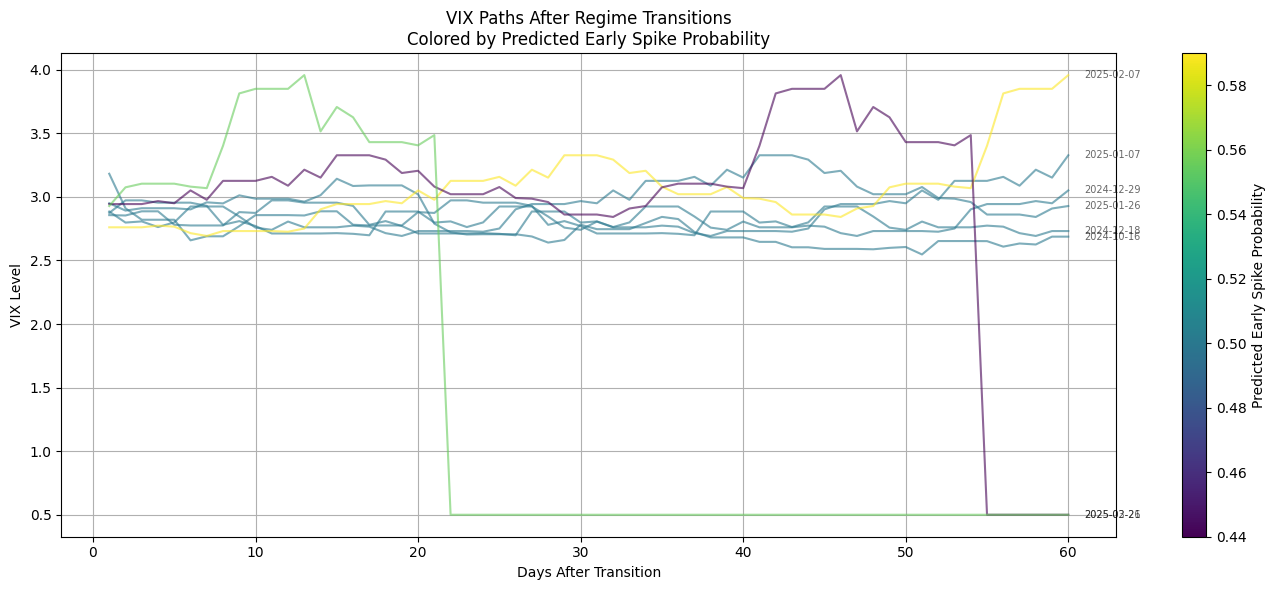

In [254]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob_test.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [255]:
df_delayed_spike_prob_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,2.950212,2.892037,2.910719,2.910719,2.910719,2.901422,2.956991,2.948641,3.012098,2.985682,...,2.652537,2.652537,2.652537,2.651833,2.608598,2.633327,2.625393,2.687167,2.687167,0.5
2024-12-18,3.181797,2.910174,2.820188,2.820188,2.820188,2.658159,2.689886,2.689886,2.769459,2.856470,...,2.760643,2.760643,2.760643,2.773838,2.765690,2.714695,2.692598,2.731115,2.731115,0.5
2024-12-29,2.856470,2.853593,2.886475,2.886475,2.780681,2.775086,2.775086,2.775086,2.880321,2.873565,...,2.725890,2.751110,2.901971,2.943386,2.943386,2.943386,2.966818,2.949688,3.050694,0.5
2025-01-07,2.873565,2.972464,2.972464,2.954389,2.954389,2.954389,2.929058,2.780061,2.809403,2.770712,...,2.977059,3.125883,3.125883,3.125883,3.157426,3.087856,3.213662,3.151453,3.327192,0.5
2025-01-26,2.884801,2.797891,2.806990,2.762538,2.799109,2.924236,2.924236,2.924236,2.845491,2.758109,...,2.990720,2.985682,2.959068,2.861057,2.861057,2.861057,2.841998,2.908539,2.927989,0.5


In [256]:
regime_windows_df_test = regime_windows_df_test.replace(2, 1)


In [257]:
regime_windows_df_test

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-10-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-18,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2025-01-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2025-01-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2025-02-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2025-02-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2025-03-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news_test = test_df.copy()                       # original df you posted   # string/ts column → index
news_test = news_test.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats_test = engineer_news_feats(news_test)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats_test.index = pd.to_datetime(news_feats_test.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats_test.index.min(),
                          news_feats_test.index.max(),
                          freq='D')

news_dense_test = (
    news_feats_test
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



In [259]:
# ------------------------------------------------------------
# 3)  BUILD ARC-LEVEL TABLE  (robust to missing news dates + look-back stats)
# ------------------------------------------------------------
records = []
lookback_days = [2, 5, 7]
lookback_feats = [
    "shock_neg",
    "vix_zscore",
    "vix_target",
    "sentiment_dominance",
]

for dt, row in vix_windows_df_test.iterrows():
    # --- detect arc in the 60-day window ---
    v = row[[f"Day {i}" for i in range(1, 61)]].values
    r = regime_windows_df_test.loc[dt, [f"Day {i}" for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc_within_regime(v, r)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur = peak_idx - start_idx
    decay_idx = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest-past news features --------
    try:
        feats_on_start = news_dense_test.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    # -------- compute look-back statistics from classification_df --------
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df_test.loc[start_date:dt_norm]

        for feat in lookback_feats:
            col_mean = window_df[feat].mean()
            col_std = window_df[feat].std()
            # percent change over the window: (last−first) / first
            if len(window_df) > 1 and window_df[feat].iloc[0] != 0:
                col_pct = (window_df[feat].iloc[-1] - window_df[feat].iloc[0]) / window_df[feat].iloc[0]
            else:
                col_pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"] = col_mean
            lookback_stats[f"{feat}_std_{w}d"]  = col_std
            lookback_stats[f"{feat}_pctchg_{w}d"] = col_pct

    # --- aggregate everything into one record ---
    records.append({
        "date_start":    dt_norm,
        "peak_vix":      peak_val,
        "vix0":          start_val,
        "T_up":          rise_dur,
        "T_half":        half_life,
        **feats_on_start,
        **lookback_stats,
    })

arc_df_test = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)


arc_df shape: (31, 63)


c:\Users\dsuni\Documents\GitHub\VIXNLP\VIXNLP\finnhub_news\macro_utils.py:347: RuntimeWarning: invalid value encountered in cast
  v = np.asarray(vix_path, dtype=np.float32)
c:\Users\dsuni\Documents\GitHub\VIXNLP\VIXNLP\finnhub_news\macro_utils.py:347: RuntimeWarning: invalid value encountered in cast
  v = np.asarray(vix_path, dtype=np.float32)


In [260]:
arc_df_test['early_spike_prob'] = vix_windows_df_test['early_spike_prob'].fillna(0.5)

In [261]:
# Get column sets
cols_arc_df = set(arc_df.columns)
cols_arc_df_test = set(arc_df_test.columns)

# Columns in arc_df but NOT in arc_df_test
diff_arc_not_test = cols_arc_df - cols_arc_df_test

# Columns in arc_df_test but NOT in arc_df
diff_test_not_arc = cols_arc_df_test - cols_arc_df

# All differing columns
diff_all = cols_arc_df.symmetric_difference(cols_arc_df_test)

# Print results
print("Columns in arc_df but not in arc_df_test:", diff_arc_not_test)
print("Columns in arc_df_test but not in arc_df:", diff_test_not_arc)
print("All differing columns:", diff_all)


Columns in arc_df but not in arc_df_test: set()
Columns in arc_df_test but not in arc_df: {'regime_t_raw', 'regime_t-1', 'regime_t', 'vix_target', 'is_sustained_regime1', 'vix_target_t+1', 'is_transition', 'panic_prob_t+1', 'regime_group'}
All differing columns: {'is_transition', 'panic_prob_t+1', 'vix_target', 'is_sustained_regime1', 'regime_group', 'vix_target_t+1', 'regime_t_raw', 'regime_t-1', 'regime_t'}


In [262]:
arc_df_test.drop(columns=diff_all, inplace=True)

In [304]:
arc_df_test['peak_vix'].iloc[-1] = np.log(55)

C:\Users\dsuni\AppData\Local\Temp\ipykernel_8260\3418063507.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  arc_df_test['peak_vix'].iloc[-1] = np.log(55)


In [305]:
arc_df_test.tail()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_mean_7d,vix_zscore_std_7d,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob
date_start,,,,,,,,,,,,,,,,,,,,,
2025-01-07,2.972464,2.873565,1.0,59.0,0.060909,-0.949384,7.0,-0.010936,-0.945139,12.0,...,0.220328,0.338106,-0.129961,2.826600,0.054582,0.009367,1.875,3.796145,-3.000000,0.500
2025-01-26,2.924236,2.884801,5.0,55.0,-0.191643,-0.971789,9.0,-0.085867,-0.854118,15.0,...,-0.735053,0.828896,-1.456885,2.753476,0.081213,0.063700,7.500,15.287717,NaN,0.500
2025-02-07,2.760643,2.760643,0.0,60.0,-0.215765,-0.975724,50.0,0.037145,-0.975307,79.0,...,0.112024,0.832310,-0.055153,2.840255,0.076250,0.002384,9.250,13.646036,-0.750000,0.590
2025-02-21,3.327192,2.943386,14.0,40.0,-0.115498,-0.975739,49.0,-0.161775,-0.971196,74.0,...,-0.451964,0.837399,-2.284270,2.749504,0.063693,0.077759,29.750,17.458113,-0.519231,0.440
2025-03-26,4.007333,2.927989,12.0,9.0,-0.078585,-0.975701,117.0,-0.078803,-0.969584,247.0,...,-1.095485,0.418374,1.242884,2.908647,0.061469,-0.027479,71.500,38.607919,1.000000,0.555


In [306]:
feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])


In [307]:
arc_df_test['early_spike_prob'] = arc_df_test['early_spike_prob'].fillna(0.5)

In [308]:
print(list(feature_cols))
print(list(arc_df_test.reindex(columns=feature_cols).columns))


['dom_0', 'dom_1', 'dominance_trigger', 'early_spike_prob', 'ewm_mean', 'ewm_std', 'headline_mean', 'headline_min', 'headline_neg_count', 'headline_pos_count', 'mean_sentiment_decay', 'overall_mean', 'overall_min', 'overall_neg_count', 'overall_pos_count', 'sentiment_dominance', 'sentiment_dominance_mean_2d', 'sentiment_dominance_mean_5d', 'sentiment_dominance_mean_7d', 'sentiment_dominance_pctchg_2d', 'sentiment_dominance_pctchg_5d', 'sentiment_dominance_pctchg_7d', 'sentiment_dominance_std_2d', 'sentiment_dominance_std_5d', 'sentiment_dominance_std_7d', 'shock_neg', 'shock_neg_mean_2d', 'shock_neg_mean_5d', 'shock_neg_mean_7d', 'shock_neg_pctchg_2d', 'shock_neg_pctchg_5d', 'shock_neg_pctchg_7d', 'shock_neg_std_2d', 'shock_neg_std_5d', 'shock_neg_std_7d', 'summary_mean', 'summary_min', 'summary_neg_count', 'vix0', 'vix_7d_pct', 'vix_ewm_zscore', 'vix_target_mean_2d', 'vix_target_mean_5d', 'vix_target_mean_7d', 'vix_target_pctchg_2d', 'vix_target_pctchg_5d', 'vix_target_pctchg_7d', 'vi

In [309]:
arc_df_test.iloc[-1]

peak_vix                          4.007333
vix0                              2.927989
T_up                             12.000000
T_half                            9.000000
summary_mean                     -0.078585
                                   ...    
vix_target_pctchg_7d             -0.027479
sentiment_dominance_mean_7d      71.500000
sentiment_dominance_std_7d       38.607919
sentiment_dominance_pctchg_7d     1.000000
early_spike_prob                  0.555000
Name: 2025-03-26 00:00:00, Length: 63, dtype: float64

c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


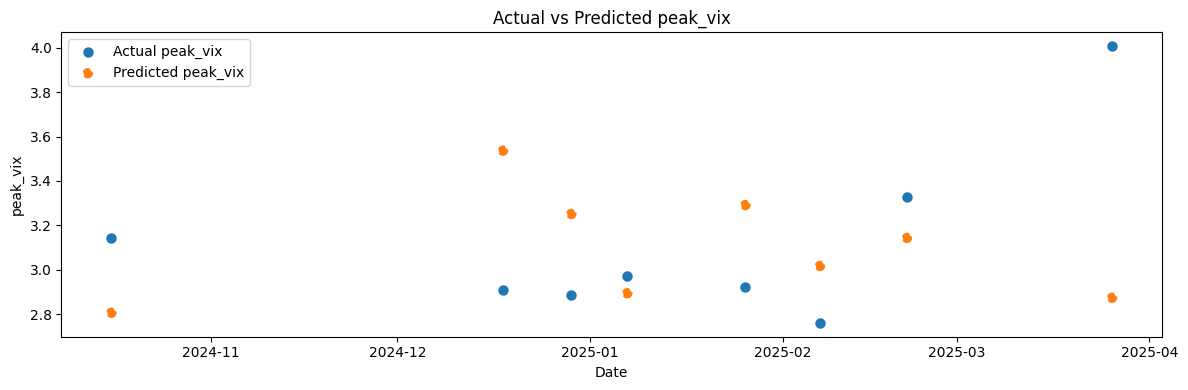

c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


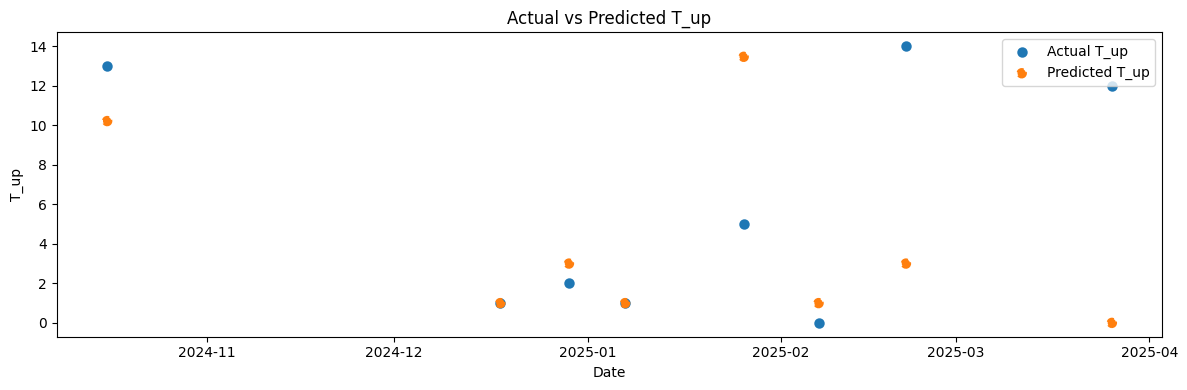

c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


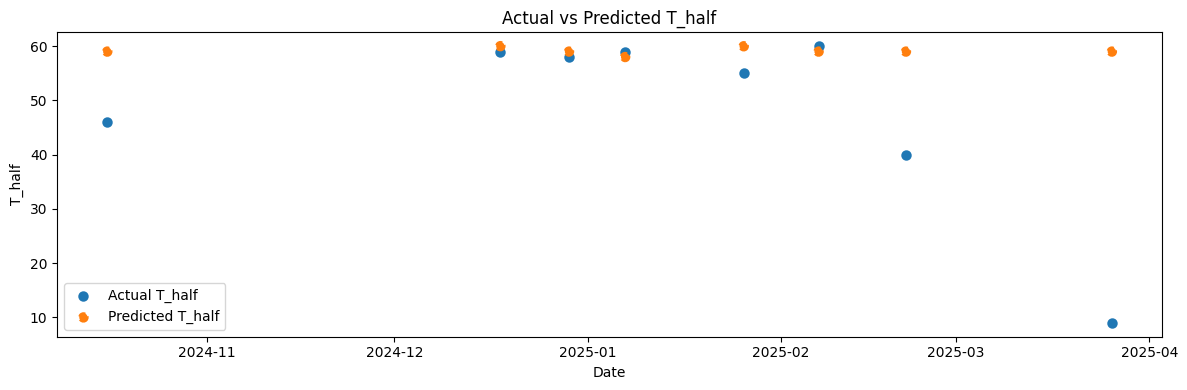

In [310]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])

X_full_test = arc_df_test.reindex(columns=feature_cols)
X_full_test = X_full_test.fillna(0)

dates = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# XGBoost graph

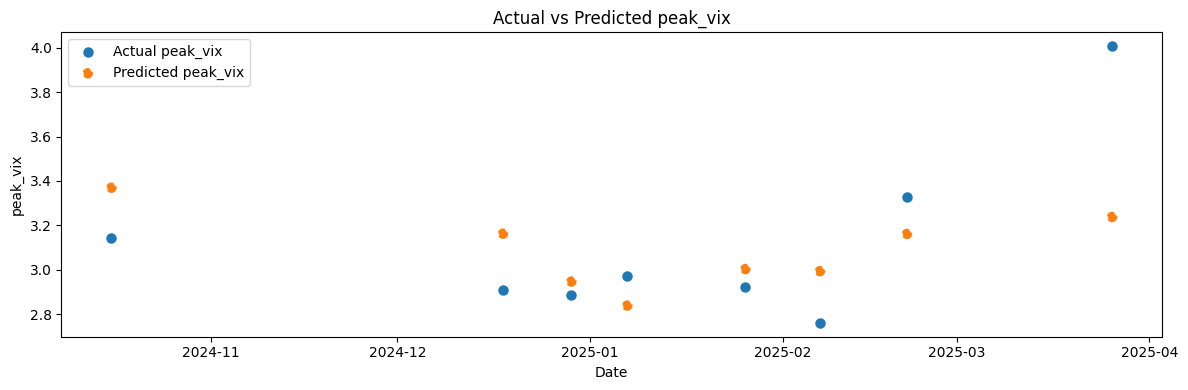

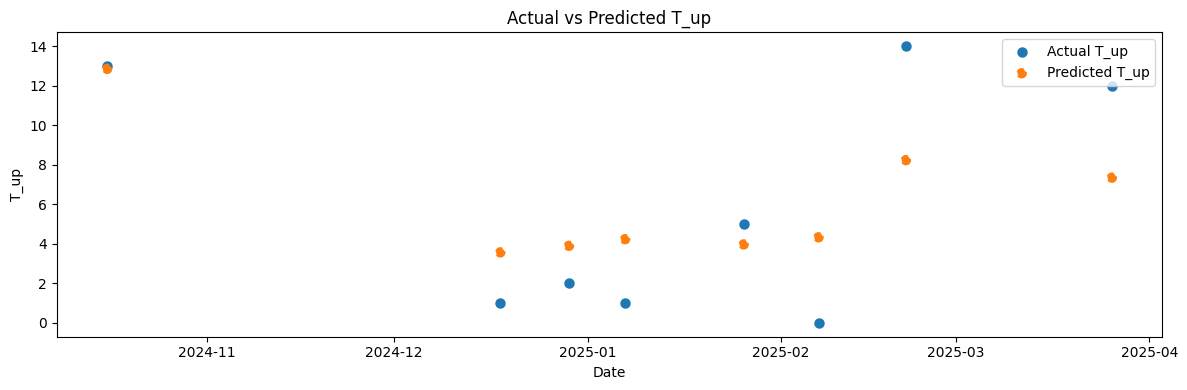

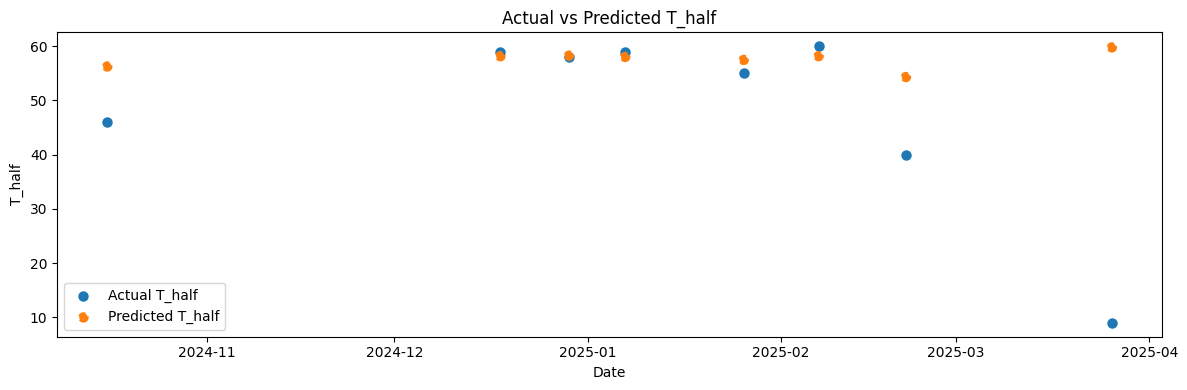

In [270]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df_test.columns.difference(["peak_vix", "T_up", "T_half"])
X_full_test       = arc_df_test[feature_cols].values
dates        = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("xgb_peak_vix.pkl"),
    "T_up":     joblib.load("xgb_T_up.pkl"),
    "T_half":   joblib.load("xgb_T_half.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# RECENT/TRADE

In [271]:
arc_df_test.head()

,peak_vix,vix0,T_up,T_half,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,...,vix_zscore_mean_7d,vix_zscore_std_7d,vix_zscore_pctchg_7d,vix_target_mean_7d,vix_target_std_7d,vix_target_pctchg_7d,sentiment_dominance_mean_7d,sentiment_dominance_std_7d,sentiment_dominance_pctchg_7d,early_spike_prob
date_start,,,,,,,,,,,,,,,,,,,,,
2024-10-16,3.142427,2.892037,13.0,46.0,-0.222685,-0.976018,47.0,-0.167496,-0.971121,51.0,...,0.412830,NaN,NaN,2.974509,NaN,NaN,-3.000,NaN,NaN,0.5
2024-12-18,2.910174,3.181797,1.0,59.0,-0.222165,-0.976408,154.0,-0.115501,-0.971749,202.0,...,0.652807,1.825703,-7.199522,2.751474,0.234340,0.272155,46.500,26.565283,-0.988764,0.5
2024-12-29,2.886475,2.856470,2.0,58.0,-0.125089,-0.974085,28.0,-0.030031,-0.968178,76.0,...,0.231891,0.375419,0.124819,2.770088,0.080478,0.012865,40.000,14.985707,1.050000,0.5
2025-01-07,2.972464,2.873565,1.0,59.0,0.060909,-0.949384,7.0,-0.010936,-0.945139,12.0,...,0.220328,0.338106,-0.129961,2.826600,0.054582,0.009367,1.875,3.796145,-3.000000,0.5
2025-01-26,2.924236,2.884801,5.0,55.0,-0.191643,-0.971789,9.0,-0.085867,-0.854118,15.0,...,-0.735053,0.828896,-1.456885,2.753476,0.081213,0.063700,7.500,15.287717,NaN,0.5


In [272]:
test_df_trade

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_target,mean_sentiment_decay,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2024-10-16,-0.222685,-0.976018,47,-0.167496,-0.971121,51,40,-0.195090,-0.973569,95,...,2.974509,-0.226288,-0.973569,-3,0,0.016615,0.412830,17.667591,4.074235,0.469391
2024-10-17,-0.224310,-0.974795,34,-0.272826,-0.973557,36,40,-0.248568,-0.974176,78,...,2.950212,-0.195090,-0.974176,8,0,0.011111,0.193659,17.691432,4.044642,0.350728
2024-10-18,-0.248795,-0.973813,27,-0.209752,-0.970884,28,22,-0.229274,-0.972349,51,...,2.892037,-0.248568,-0.972349,-4,0,-0.120059,-0.260678,17.697028,4.011310,0.083008
2024-10-19,0.076486,-0.904173,5,-0.051621,-0.936994,13,4,0.012432,-0.920584,25,...,2.910719,-0.229274,-0.920584,7,0,-0.043727,-0.148076,17.708152,3.978954,0.166337
2024-10-20,-0.148248,-0.970708,11,0.232043,-0.928842,25,4,0.041897,-0.949775,43,...,2.910719,0.012432,-0.949775,7,0,-0.188604,-0.183860,17.719091,3.946843,0.164919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-12,-0.089461,-0.957227,43,-0.008691,-0.941981,105,28,-0.049076,-0.949604,195,...,3.430432,-0.304711,-0.949604,47,0,0.426790,0.340215,22.315343,9.129809,0.939193
2025-04-13,-0.086733,-0.972444,31,-0.158017,-0.968547,71,34,-0.122375,-0.970495,145,...,3.430432,-0.049076,-0.970495,43,0,0.386445,0.313508,22.457073,9.120357,0.924627
2025-04-14,-0.063972,-0.972737,123,-0.219557,-0.973235,208,154,-0.141765,-0.972986,447,...,3.430432,-0.122375,-0.972986,116,0,0.386445,0.283756,22.596460,9.108883,0.910489


In [273]:
def get_past_60_trading_days(df, target_date):
    """
    Given a DataFrame with a DatetimeIndex and a target date (string or datetime),
    return the 60 trading days *before* that date (exclusive).
    """
    # Ensure datetime format
    target_date = pd.to_datetime(target_date)
    
    # Filter to dates strictly before the target date
    df_before = df[df.index < target_date]
    
    # Get last 60 rows before the target date
    return df_before.tail(61)


In [274]:
df_trade = get_past_60_trading_days(test_df_trade, "2024-12-14")

In [275]:
df_trade.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,vix_target,mean_sentiment_decay,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore
date,,,,,,,,,,,,,,,,,,,,,
2024-12-09,0.042288,-0.973634,63,-0.042489,-0.971553,193,53,-0.000100,-0.972594,376,...,2.652537,-0.125769,-0.972594,120,0,-0.028082,-0.309846,16.697908,3.457712,-0.725309
2024-12-10,-0.144333,-0.975175,100,-0.060879,-0.973924,182,78,-0.102606,-0.974550,342,...,2.651833,-0.000100,-0.974550,60,0,-0.028767,-0.295634,16.656290,3.444137,-0.718987
2024-12-11,-0.024597,-0.973637,107,-0.014560,-0.971444,214,89,-0.019578,-0.972541,410,...,2.608598,-0.102606,-0.972541,89,0,-0.036879,-0.782323,16.605442,3.438189,-0.879952
2024-12-12,-0.075603,-0.973693,91,-0.009159,-0.972878,170,73,-0.042381,-0.973286,322,...,2.633327,-0.019578,-0.973286,61,0,-0.012766,-0.457400,16.561054,3.426947,-0.770673
2024-12-13,-0.164213,-0.974127,81,-0.112501,-0.972634,155,65,-0.138357,-0.973381,294,...,2.625393,-0.042381,-0.973381,58,0,0.022206,-0.546520,16.515582,3.416711,-0.791867


In [276]:
# 1. After fitting on training set
train_params = results.params

# 2. Prepare your test data

X_test = df_trade[selected_features]
y_test = df_trade['vix_ewm_zscore']


In [277]:
X_test.tail()

,shock_neg,dominance_trigger
date,,
2024-12-09,-0.972594,0
2024-12-10,-0.974550,0
2024-12-11,-0.972541,0
2024-12-12,-0.973286,0
2024-12-13,-0.973381,0


In [278]:
# 3. Define same model on test data
model_trade = MarkovRegression(
    endog=y_test,
    exog=X_test,
    k_regimes=3,
    switching_variance=False
)

c:\Users\dsuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [279]:
results_test = model_trade.filter(train_params)

# 5. Extract real-time regime (filtered) — sensitive threshold
df_trade['regime_t_raw'] = results_test.filtered_marginal_probabilities.idxmax(axis=1)
df_trade['regime_t'] = df_trade['regime_t_raw'].apply(lambda r: 1 if r in [1, 2] else 0)

# 6. Predict probability of panic regime tomorrow using classifier (NO regime_t)
df_trade['panic_prob_t+1'] = clf.predict_proba(X_test)[:, 1]

In [280]:
df_trade.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,ewm_mean,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,panic_prob_t+1
date,,,,,,,,,,,,,,,,,,,,,
2024-12-09,0.042288,-0.973634,63,-0.042489,-0.971553,193,53,-0.000100,-0.972594,376,...,120,0,-0.028082,-0.309846,16.697908,3.457712,-0.725309,0,0,0.396969
2024-12-10,-0.144333,-0.975175,100,-0.060879,-0.973924,182,78,-0.102606,-0.974550,342,...,60,0,-0.028767,-0.295634,16.656290,3.444137,-0.718987,0,0,0.515323
2024-12-11,-0.024597,-0.973637,107,-0.014560,-0.971444,214,89,-0.019578,-0.972541,410,...,89,0,-0.036879,-0.782323,16.605442,3.438189,-0.879952,0,0,0.389716
2024-12-12,-0.075603,-0.973693,91,-0.009159,-0.972878,170,73,-0.042381,-0.973286,322,...,61,0,-0.012766,-0.457400,16.561054,3.426947,-0.770673,0,0,0.431576
2024-12-13,-0.164213,-0.974127,81,-0.112501,-0.972634,155,65,-0.138357,-0.973381,294,...,58,0,0.022206,-0.546520,16.515582,3.416711,-0.791867,0,0,0.441597


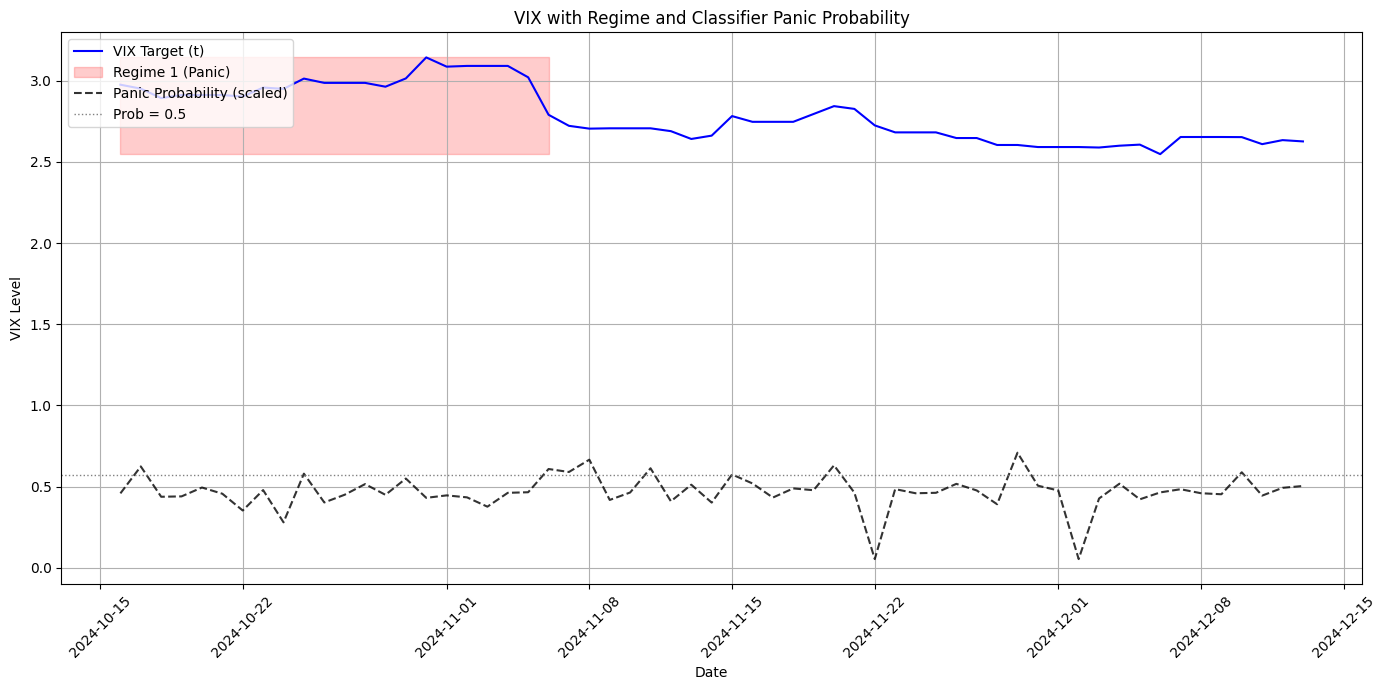

In [281]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(df_trade.index, df_trade["vix_target"], label="VIX Target (t)", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    df_trade.index,
    df_trade["vix_target"].min(),
    df_trade["vix_target"].max(),
    where=df_trade["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = df_trade["panic_prob_t+1"] * (df_trade["vix_target"].max() - 2)
plt.plot(df_trade.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (df_trade["vix_target"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [282]:
classification_df_trade = macro_utils.identify_sustained_regimes_and_transitions(df_trade, trade = True)

In [283]:
classification_df_trade.tail()

,summary_mean,summary_min,summary_neg_count,headline_mean,headline_min,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_pos_count,...,ewm_mean,ewm_std,vix_ewm_zscore,regime_t_raw,regime_t,panic_prob_t+1,regime_group,is_sustained_regime1,regime_t-1,is_transition
date,,,,,,,,,,,,,,,,,,,,,
2024-12-09,0.042288,-0.973634,63,-0.042489,-0.971553,193,53,-0.000100,-0.972594,376,...,16.697908,3.457712,-0.725309,0,0,0.396969,2,False,0.0,False
2024-12-10,-0.144333,-0.975175,100,-0.060879,-0.973924,182,78,-0.102606,-0.974550,342,...,16.656290,3.444137,-0.718987,0,0,0.515323,2,False,0.0,False
2024-12-11,-0.024597,-0.973637,107,-0.014560,-0.971444,214,89,-0.019578,-0.972541,410,...,16.605442,3.438189,-0.879952,0,0,0.389716,2,False,0.0,False
2024-12-12,-0.075603,-0.973693,91,-0.009159,-0.972878,170,73,-0.042381,-0.973286,322,...,16.561054,3.426947,-0.770673,0,0,0.431576,2,False,0.0,False
2024-12-13,-0.164213,-0.974127,81,-0.112501,-0.972634,155,65,-0.138357,-0.973381,294,...,16.515582,3.416711,-0.791867,0,0,0.441597,2,False,0.0,False


In [284]:
result_trade = macro_utils.transform_vix_data(classification_df_trade, window=50, trade = True)
vix_windows_past_df_trade = result_trade["vix_windows_past_df_train"]

In [285]:
from macro_utils import calculate_pct_changes

# Get current date (your live transition point — usually last row in trade DF)
live_index = classification_df_trade[classification_df_trade["is_transition"]].index[-1:]
print(f"✅ Using live index: {live_index}")

# Calculate past % changes from historical VIX column
vix_pct_change_lookback_df_trade, used_indices = calculate_pct_changes(
    df_model=classification_df_trade,
    valid_indices=live_index,
    lookback=30,
    vix_column="vix_target"
)

# Now predict with  classifier
early_spike_prob_trade = clf_delayed_spike_prob.predict_proba(vix_pct_change_lookback_df_trade)[0][1]
print(f"🟢 Early spike probability: {early_spike_prob_trade:.2%}")


✅ Using live index: DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)


ValueError: Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required by RandomForestClassifier.

In [286]:
vix_pct_change_lookback_df_trade.head()

,Day -30,Day -29,Day -28,Day -27,Day -26,Day -25,Day -24,Day -23,Day -22,Day -21,...,Day -10,Day -9,Day -8,Day -7,Day -6,Day -5,Day -4,Day -3,Day -2,Day -1


In [287]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news_test = df_trade.copy()                       # original df you posted   # string/ts column → index
news_test = news_test.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats_trade = engineer_news_feats(news_test)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats_trade.index = pd.to_datetime(news_feats_trade.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats_trade.index.min(),
                          news_feats_trade.index.max(),
                          freq='D')

news_dense_trade = (
    news_feats_test
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)

In [288]:
news_dense_trade.columns

Index(['summary_mean', 'summary_min', 'summary_neg_count', 'headline_mean',
       'headline_min', 'headline_pos_count', 'headline_neg_count',
       'overall_mean', 'overall_min', 'overall_pos_count', 'overall_neg_count',
       'vix_target', 'mean_sentiment_decay', 'shock_neg',
       'sentiment_dominance', 'dominance_trigger', 'vix_7d_pct', 'vix_zscore',
       'ewm_mean', 'ewm_std', 'vix_ewm_zscore', 'regime_t_raw', 'regime_t',
       'panic_prob_t+1', 'vix_target_t+1', 'regime_group',
       'is_sustained_regime1', 'regime_t-1', 'is_transition', 'dom_0',
       'dom_1'],
      dtype='object')

In [289]:
feature_cols = feature_cols.drop(['date','date.1'], errors='ignore')


In [290]:
df_trade.columns

Index(['summary_mean', 'summary_min', 'summary_neg_count', 'headline_mean',
       'headline_min', 'headline_pos_count', 'headline_neg_count',
       'overall_mean', 'overall_min', 'overall_pos_count', 'overall_neg_count',
       'vix_target', 'mean_sentiment_decay', 'shock_neg',
       'sentiment_dominance', 'dominance_trigger', 'vix_7d_pct', 'vix_zscore',
       'ewm_mean', 'ewm_std', 'vix_ewm_zscore', 'regime_t_raw', 'regime_t',
       'panic_prob_t+1', 'regime_group', 'is_sustained_regime1', 'regime_t-1',
       'is_transition'],
      dtype='object')

In [291]:
def build_live_arc_row(start_idx,
                       news_dense,
                       classification_df_trade,
                       feature_cols,
                       lookback_days=(2, 5, 7),
                       lookback_feats=("shock_neg", "vix_zscore", "vix_target", "sentiment_dominance")):
    """
    Build one live-arc row of features at timestamp `start_idx`.
    Returns a DataFrame with one row and columns exactly = feature_cols.
    """
    # normalize the timestamp
    dt_norm = pd.to_datetime(start_idx).normalize()

    # --- 1) grab the base row from classification_df_trade ---
    try:
        row = classification_df_trade.loc[[start_idx]].copy()
    except KeyError:
        print(f"❌ No classification data at {start_idx}")
        return None

    # --- 2) pull the latest news features (dropping any 'date' col) ---
    try:
        feats_on_start = (
            news_dense
            .loc[:dt_norm]
            .iloc[-1]
            .drop(labels=["date"], errors="ignore")
            .to_dict()
        )
    except IndexError:
        print(f"❌ No prior news available at {dt_norm}")
        return None

    # --- 3) one-hot encode the 'dominance_trigger' field ---
    dom_dummies = pd.get_dummies(row["dominance_trigger"], prefix="dom")
    # ensure both dom_0 and dom_1 exist
    for col in ("dom_0", "dom_1"):
        dom_dummies[col] = dom_dummies.get(col, 0)
    row = pd.concat([row, dom_dummies], axis=1)

    # --- 4) merge in the news features ---
    row = row.assign(**feats_on_start)

    # --- 5) drop any raw date columns to avoid leakage ---
    row = row.drop(columns=[c for c in row.columns if c.startswith("date")], errors="ignore")

    # --- 6) compute look-back stats for each window & feature ---
    lookback_stats = {}
    for w in lookback_days:
        start_date = dt_norm - pd.Timedelta(days=w)
        window_df = classification_df_trade.loc[start_date:dt_norm]

        for feat in lookback_feats:
            series = window_df.get(feat, pd.Series(dtype=float))
            m = series.mean()
            s = series.std()
            if len(series) > 1 and series.iloc[0] != 0:
                pct = (series.iloc[-1] - series.iloc[0]) / series.iloc[0]
            else:
                pct = np.nan

            lookback_stats[f"{feat}_mean_{w}d"]   = m
            lookback_stats[f"{feat}_std_{w}d"]    = s
            lookback_stats[f"{feat}_pctchg_{w}d"] = pct

    # merge lookback stats into row
    row = row.assign(**lookback_stats)

    # --- 7) finally, extract exactly the requested feature_cols (filling missing with 0) ---
    feature_values = {
        col: row[col].iloc[0] if col in row.columns else 0.0
        for col in feature_cols
    }
    arc_row = pd.DataFrame([feature_values], index=[start_idx])[feature_cols]
    return arc_row


In [292]:
start_idx = classification_df_trade[classification_df_trade["is_transition"]].index[-1]

# Build feature row
arc_row_live = build_live_arc_row(start_idx, news_dense_trade, classification_df_trade, feature_cols)


IndexError: index -1 is out of bounds for axis 0 with size 0

In [2718]:
arc_row_live['early_spike_prob'] = early_spike_prob_trade

In [293]:
print(early_spike_prob_trade)

NameError: name 'early_spike_prob_trade' is not defined

In [294]:
if early_spike_prob_trade > 0.75:
    min_vix=df_trade['vix_target'].iloc[-20:].min()
    arc_row_live['vix0'] = min_vix
    print('<')
    print(min_vix)
else:
    min_vix=df_trade['vix_target'].iloc[-5:].min()
    arc_row_live['vix0'] = min_vix
    print(min_vix)


NameError: name 'early_spike_prob_trade' is not defined

In [295]:
print(arc_row_live['vix0'])

NameError: name 'arc_row_live' is not defined

In [2722]:
arc_row_live.columns

Index(['dom_0', 'dom_1', 'dominance_trigger', 'early_spike_prob', 'ewm_mean',
       'ewm_std', 'headline_mean', 'headline_min', 'headline_neg_count',
       'headline_pos_count', 'mean_sentiment_decay', 'overall_mean',
       'overall_min', 'overall_neg_count', 'overall_pos_count',
       'sentiment_dominance', 'sentiment_dominance_mean_2d',
       'sentiment_dominance_mean_5d', 'sentiment_dominance_mean_7d',
       'sentiment_dominance_pctchg_2d', 'sentiment_dominance_pctchg_5d',
       'sentiment_dominance_pctchg_7d', 'sentiment_dominance_std_2d',
       'sentiment_dominance_std_5d', 'sentiment_dominance_std_7d', 'shock_neg',
       'shock_neg_mean_2d', 'shock_neg_mean_5d', 'shock_neg_mean_7d',
       'shock_neg_pctchg_2d', 'shock_neg_pctchg_5d', 'shock_neg_pctchg_7d',
       'shock_neg_std_2d', 'shock_neg_std_5d', 'shock_neg_std_7d',
       'summary_mean', 'summary_min', 'summary_neg_count', 'vix0',
       'vix_7d_pct', 'vix_ewm_zscore', 'vix_target_mean_2d',
       'vix_target_mea

In [2723]:
import joblib
import pandas as pd

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}


In [2724]:
print(list(feature_cols))
print(list(arc_df_test.columns))

['dom_0', 'dom_1', 'dominance_trigger', 'early_spike_prob', 'ewm_mean', 'ewm_std', 'headline_mean', 'headline_min', 'headline_neg_count', 'headline_pos_count', 'mean_sentiment_decay', 'overall_mean', 'overall_min', 'overall_neg_count', 'overall_pos_count', 'sentiment_dominance', 'sentiment_dominance_mean_2d', 'sentiment_dominance_mean_5d', 'sentiment_dominance_mean_7d', 'sentiment_dominance_pctchg_2d', 'sentiment_dominance_pctchg_5d', 'sentiment_dominance_pctchg_7d', 'sentiment_dominance_std_2d', 'sentiment_dominance_std_5d', 'sentiment_dominance_std_7d', 'shock_neg', 'shock_neg_mean_2d', 'shock_neg_mean_5d', 'shock_neg_mean_7d', 'shock_neg_pctchg_2d', 'shock_neg_pctchg_5d', 'shock_neg_pctchg_7d', 'shock_neg_std_2d', 'shock_neg_std_5d', 'shock_neg_std_7d', 'summary_mean', 'summary_min', 'summary_neg_count', 'vix0', 'vix_7d_pct', 'vix_ewm_zscore', 'vix_target_mean_2d', 'vix_target_mean_5d', 'vix_target_mean_7d', 'vix_target_pctchg_2d', 'vix_target_pctchg_5d', 'vix_target_pctchg_7d', 'vi

In [2725]:
feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])

In [2726]:
arc_row_live = arc_row_live.reindex(columns=feature_cols)

In [296]:
arc_row_live['vix0']

NameError: name 'arc_row_live' is not defined

In [297]:
arc_row_live

NameError: name 'arc_row_live' is not defined

In [298]:

# Predict
if arc_row_live is not None:
    live_preds = {
        target: float(models[target].predict(arc_row_live[feature_cols].values))
        for target in models
    }

    print(f"\n📍 Live prediction at {start_idx.date()}:")
    for target, val in live_preds.items():
        print(f"  {target:<8} → {val:.2f}")
else:
    print("❌ Failed to build input row.")


NameError: name 'arc_row_live' is not defined

# XGB prediction

In [2731]:
import joblib
import pandas as pd

xgb_models = {
    "peak_vix": joblib.load("xgb_peak_vix.pkl"),
    "T_up":     joblib.load("xgb_T_up.pkl"),
    "T_half":   joblib.load("xgb_T_half.pkl"),
}


In [2732]:

# Predict
if arc_row_live is not None:
    live_preds = {
        target: float(xgb_models[target].predict(arc_row_live[feature_cols].values))
        for target in xgb_models
    }

    print(f"\n📍 Live prediction at {start_idx.date()}:")
    for target, val in live_preds.items():
        print(f"  {target:<8} → {val:.2f}")
else:
    print("❌ Failed to build input row.")



📍 Live prediction at 2024-12-10:
  peak_vix → 2.91
  T_up     → 6.85
  T_half   → 58.30


/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_1135/4101907363.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target: float(xgb_models[target].predict(arc_row_live[feature_cols].values))
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_1135/4101907363.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target: float(xgb_models[target].predict(arc_row_live[feature_cols].values))
/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_1135/4101907363.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your a